# 1) Project Name:

### 👨🏻‍💼Hr Department Project

# 2) Dataset Features:

#### received_callback  ==>  Indicator for if there was a callback from the job posting for the person listed on this resume.
#### firstname	 ==>  The first name used on the resume.
#### race   ==>  Inferred race associated with the first name on the resume.
#### gender   ==>  Inferred gender associated with the first name on the resume.
#### years_college    ==>  Years of college education listed on the resume.
#### college_degree    ==>   Indicator for if the resume listed a college degree.
#### honors	 ==>    Indicator for if the resume listed that the candidate has been awarded some honors.
#### worked_during_school  ==>  Indicator for if the resume listed working while in school.
#### years_experience   ==>  Years of experience listed on the resume.
#### computer_skills    ==>   Indicator for if computer skills were listed on the resume. These skills were adapted for listings, though the skills were assigned independently of other details on the resume.
#### special_skills   ==>  Indicator for if any special skills were listed on the resume.
#### volunteer   ==>     Indicator for if volunteering was listed on the resume.
#### military   ==>    Indicator for if military experience was listed on the resume.
#### employment_holes   	==>    Indicator for if there were holes in the person's employment history.
#### has_email_address  	==>    Indicator for if the resume lists an email address.

# 3) Problem Statement:

## · Business understanding – What does the business need?

### · The main goal of creating our project is the automation of HR work. That is, we learn how compatible a candidate is with the help of a model. Because there are certain requirements for a vacancy, and these requirements are general requirements that do not change according to the candidate. Thus, we use the model to pass these requirements on each candidate, and as a result, the model shows us the 10 candidates who best meet the requirements.

### · For example, there may be a case where the CEO instructs HR to find an employee for an empty position. Every vacancy is shared and between 500 and 800 candidates apply. In the next step, hr tries to narrow down each of them to find the best candidate

### · But if we automate this process, certain clusters will be created and the model will return the top 50-100 candidates who meet the maximum requirements. As a result, Hr will only look at the cv of the cluster that best meets the requirements. Thus, we save time and employ the least number of hr workers. On the one hand, this lowers the cost of the company.

# 4) Importing libraries and Data

In [1]:
#Let's import libraries
# handle table-like data and matrices
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import parallel_coordinates

# Dimension reduction 
from sklearn.decomposition import PCA

# Outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Clustering
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# Ignore warnings
import warnings as wg
wg.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
#load dataset
df = pd.read_csv('resume_clustering.csv')

# 5) Familiarization with information

In [3]:
# Head - first 5 rows
df.head()

firstname   race gender  years_college  college_degree  honors  \
0   Allison  white      f              4               1       0   
1   Kristen  white      f              3               0       0   
2   Lakisha  black      f              4               1       0   
3   Latonya  black      f              3               0       0   
4    Carrie  white      f              3               0       0   

   worked_during_school  years_experience  computer_skills  special_skills  \
0                     0                 6                1               0   
1                     1                 6                1               0   
2                     1                 6                1               0   
3                     0                 6                1               1   
4                     1                22                1               0   

   volunteer  military  employment_holes  has_email_address  
0          0         0                 1                  0  
1          1         1                 0                  1  
2          0         0                 0                  0  
3          1         0                 1                  1  
4          0         0                 0                  1

In [4]:
# Info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   firstname             4870 non-null   object
 1   race                  4870 non-null   object
 2   gender                4870 non-null   object
 3   years_college         4870 non-null   int64 
 4   college_degree        4870 non-null   int64 
 5   honors                4870 non-null   int64 
 6   worked_during_school  4870 non-null   int64 
 7   years_experience      4870 non-null   int64 
 8   computer_skills       4870 non-null   int64 
 9   special_skills        4870 non-null   int64 
 10  volunteer             4870 non-null   int64 
 11  military              4870 non-null   int64 
 12  employment_holes      4870 non-null   int64 
 13  has_email_address     4870 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 532.8+ KB


In [5]:
#Let's look at data types
df.dtypes

firstname               object
race                    object
gender                  object
years_college            int64
college_degree           int64
honors                   int64
worked_during_school     int64
years_experience         int64
computer_skills          int64
special_skills           int64
volunteer                int64
military                 int64
employment_holes         int64
has_email_address        int64
dtype: object

In [6]:
#Let's look at describe of data 
df.describe().T

count      mean       std  min  25%  50%  75%   max
years_college         4870.0  3.618480  0.714997  0.0  3.0  4.0  4.0   4.0
college_degree        4870.0  0.719507  0.449286  0.0  0.0  1.0  1.0   1.0
honors                4870.0  0.052772  0.223601  0.0  0.0  0.0  0.0   1.0
worked_during_school  4870.0  0.559548  0.496492  0.0  0.0  1.0  1.0   1.0
years_experience      4870.0  7.842916  5.044612  1.0  5.0  6.0  9.0  44.0
computer_skills       4870.0  0.820534  0.383782  0.0  1.0  1.0  1.0   1.0
special_skills        4870.0  0.328747  0.469806  0.0  0.0  0.0  1.0   1.0
volunteer             4870.0  0.411499  0.492156  0.0  0.0  0.0  1.0   1.0
military              4870.0  0.097125  0.296159  0.0  0.0  0.0  0.0   1.0
employment_holes      4870.0  0.448049  0.497345  0.0  0.0  0.0  1.0   1.0
has_email_address     4870.0  0.479261  0.499621  0.0  0.0  0.0  1.0   1.0

In [7]:
#Let's look at number of unique values for each column
df.nunique()

firstname               36
race                     2
gender                   2
years_college            5
college_degree           2
honors                   2
worked_during_school     2
years_experience        26
computer_skills          2
special_skills           2
volunteer                2
military                 2
employment_holes         2
has_email_address        2
dtype: int64

# 6) Handling missing value

In [8]:
#Let's look at null values
df.isnull().sum()

firstname               0
race                    0
gender                  0
years_college           0
college_degree          0
honors                  0
worked_during_school    0
years_experience        0
computer_skills         0
special_skills          0
volunteer               0
military                0
employment_holes        0
has_email_address       0
dtype: int64

<Axes: >

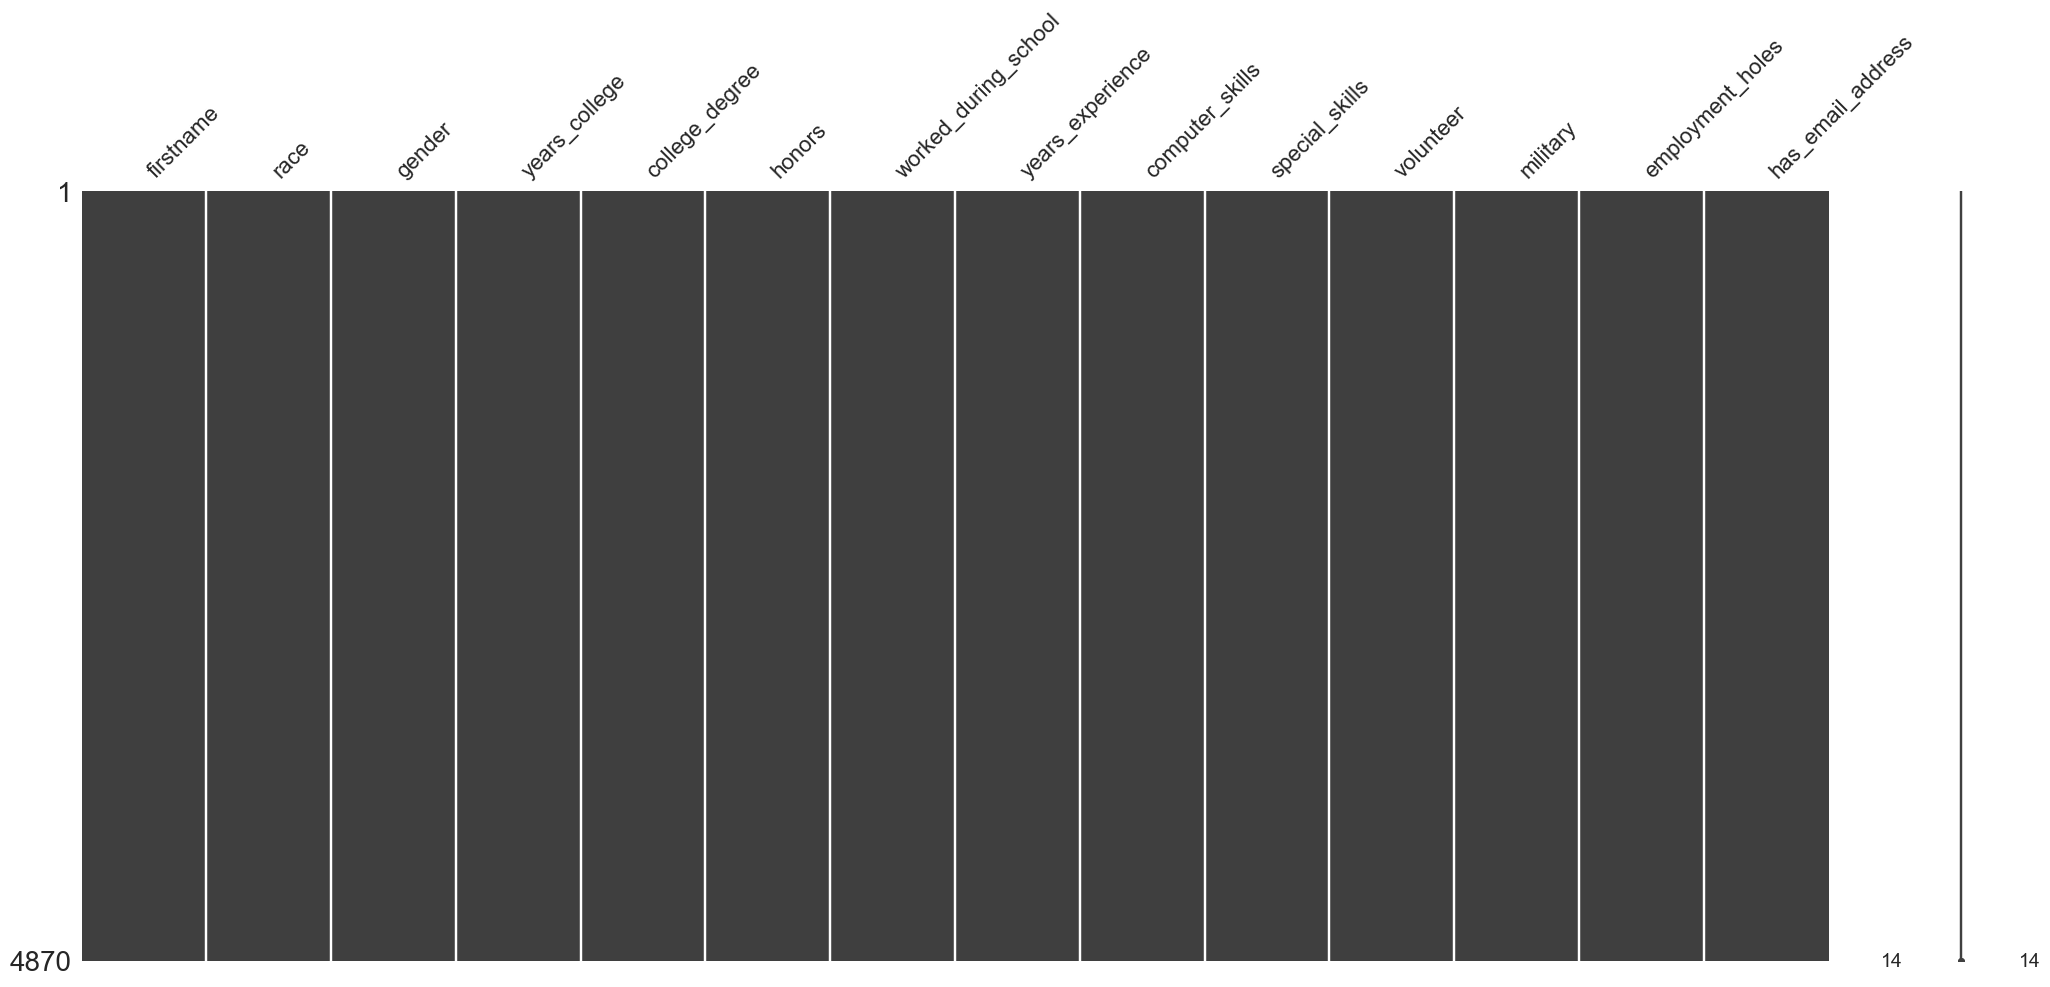

In [9]:
# Let's look at as visual
msno.matrix(df)

# 7) Feature Engineering

In [10]:
#Let's remove unnecessary column
del df['firstname']

In [11]:
# Change type of gender column
df['gender'] = df['gender'].map({'m':1,'f':0})

In [12]:
# Get dummies
df = pd.get_dummies(df , columns = ['race'])
for i in df.select_dtypes('bool').columns:
    df[i] = df[i].map({True:1 , False:0})

In [13]:
df

gender  years_college  college_degree  honors  worked_during_school  \
0          0              4               1       0                     0   
1          0              3               0       0                     1   
2          0              4               1       0                     1   
3          0              3               0       0                     0   
4          0              3               0       0                     1   
...      ...            ...             ...     ...                   ...   
4865       0              3               0       0                     0   
4866       0              4               1       0                     1   
4867       1              4               1       0                     1   
4868       0              4               1       0                     1   
4869       0              4               1       0                     0   

      years_experience  computer_skills  special_skills  volunteer  military  \
0                    6                1               0          0         0   
1                    6                1               0          1         1   
2                    6                1               0          0         0   
3                    6                1               1          1         0   
4                   22                1               0          0         0   
...                ...              ...             ...        ...       ...   
4865                 1                1               1          0         0   
4866                 6                1               0          0         0   
4867                 8                1               0          1         0   
4868                 2                1               0          1         1   
4869                 7                0               0          0         0   

      employment_holes  has_email_address  race_black  race_white  
0                    1                  0           0           1  
1                    0                  1           0           1  
2                    0                  0           1           0  
3                    1                  1           1           0  
4                    0                  1           0           1  
...                ...                ...         ...         ...  
4865                 1                  0           1           0  
4866                 0                  0           1           0  
4867                 0                  1           0           1  
4868                 0                  1           1           0  
4869                 1                  0           0           1  

[4870 rows x 14 columns]

In [14]:
# Use pd.cut() to categorize Age into bins
bins = [0,10,20,50]
df['years_range'] = pd.cut(df['years_experience'], bins=bins, labels=['0-10', '10-20', '20+'])

In [15]:
#Let's look at years range
df.years_range.value_counts()

years_range
0-10     3860
10-20     834
20+       176
Name: count, dtype: int64

In [16]:
#Let's map years degrees as new column
mapping = {'0-10':1,'10-20':2,'20+':3}
df['years_degrees'] = df['years_range'].map(mapping)

In [17]:
#Let's remove useless columns
del df['years_range']

In [18]:
#Let's look at new data frame
df['years_degrees'] = df['years_degrees'].astype('int')

In [19]:
# Let's multiply 'years_experience' and 'college_degree' columns
df['exp_coldeg'] = df['years_degrees'] * df['college_degree']

# 8) Data Analysis and Visualization

In [20]:
#Let's look at shape
df.shape

(4870, 16)

In [21]:
#Let's look at columns
df.columns

Index(['gender', 'years_college', 'college_degree', 'honors',
       'worked_during_school', 'years_experience', 'computer_skills',
       'special_skills', 'volunteer', 'military', 'employment_holes',
       'has_email_address', 'race_black', 'race_white', 'years_degrees',
       'exp_coldeg'],
      dtype='object')

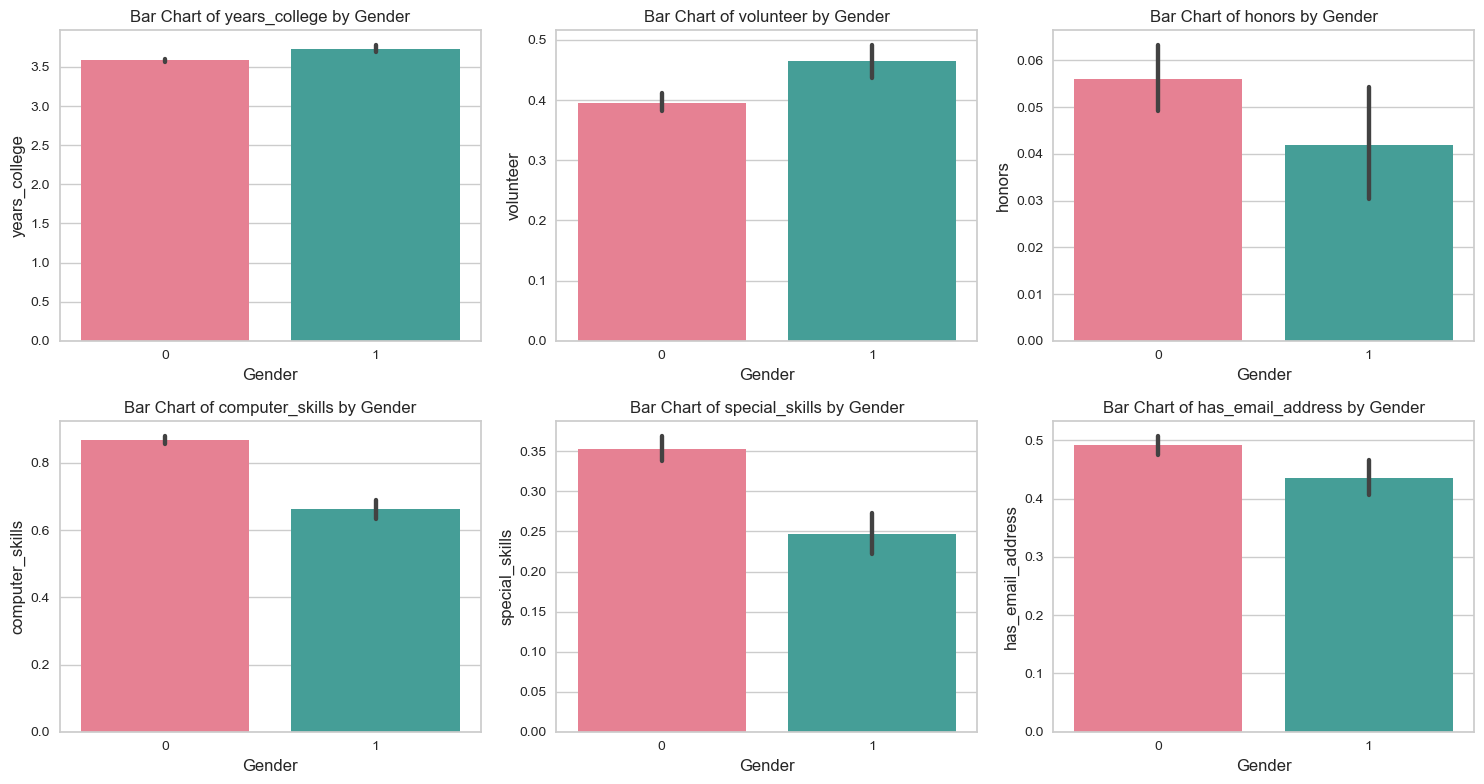

In [22]:
# Variables of interest for bar charts
variables_of_interest = ['years_college', 'volunteer','honors',
                         'computer_skills', 'special_skills', 'has_email_address']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for i, variable in enumerate(variables_of_interest):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    sns.barplot(x='gender', y=variable, data=df, palette='husl', ax=ax)
    ax.set_xlabel('Gender')
    ax.set_ylabel(variable)
    ax.set_title(f'Bar Chart of {variable} by Gender')
plt.tight_layout()

plt.show()

In [23]:
# Create a cross-tabulation table
cross_table = pd.crosstab(df['computer_skills'], df['special_skills'])
cross_table.columns = ['No Special Skills', 'Has Special Skills']
cross_table.index = ['No Computer Skills', 'Has Computer Skills']
print(cross_table)

                     No Special Skills  Has Special Skills
No Computer Skills                 606                 268
Has Computer Skills               2663                1333


<Figure size 800x600 with 0 Axes>

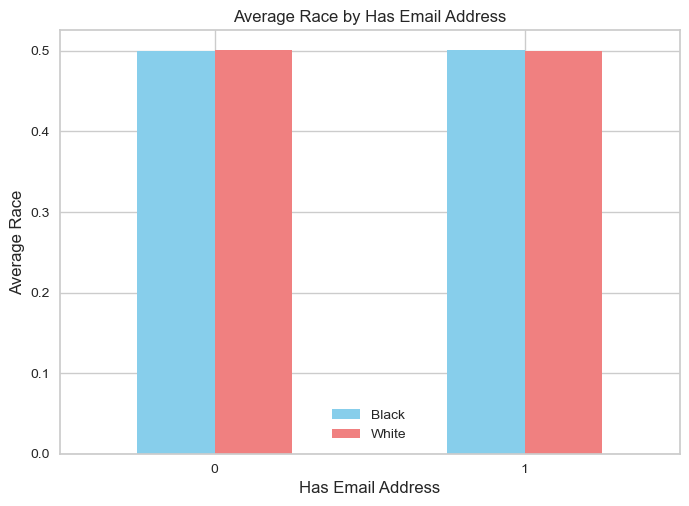

In [24]:
# Group by 'has_email_address' and calculate the mean of 'race_black' and 'race_white'
average_race_by_email = df.groupby('has_email_address')[['race_black', 'race_white']].mean()
# Let's create a bar plot
plt.figure(figsize=(8, 6))
average_race_by_email.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Has Email Address')
plt.ylabel('Average Race')
plt.title('Average Race by Has Email Address')
plt.legend(['Black', 'White']) 
plt.xticks(rotation=0) 

plt.show()

In [25]:
#Let's look at dataframe
df.head()

gender  years_college  college_degree  honors  worked_during_school  \
0          0              4               1       0                     0   
1          0              3               0       0                     1   
2          0              4               1       0                     1   
3          0              3               0       0                     0   
4          0              3               0       0                     1   
...      ...            ...             ...     ...                   ...   
4865       0              3               0       0                     0   
4866       0              4               1       0                     1   
4867       1              4               1       0                     1   
4868       0              4               1       0                     1   
4869       0              4               1       0                     0   

      years_experience  computer_skills  special_skills  volunteer  military  \
0                    6                1               0          0         0   
1                    6                1               0          1         1   
2                    6                1               0          0         0   
3                    6                1               1          1         0   
4                   22                1               0          0         0   
...                ...              ...             ...        ...       ...   
4865                 1                1               1          0         0   
4866                 6                1               0          0         0   
4867                 8                1               0          1         0   
4868                 2                1               0          1         1   
4869                 7                0               0          0         0   

      employment_holes  has_email_address  race_black  race_white  \
0                    1                  0           0           1   
1                    0                  1           0           1   
2                    0                  0           1           0   
3                    1                  1           1           0   
4                    0                  1           0           1   
...                ...                ...         ...         ...   
4865                 1                  0           1           0   
4866                 0                  0           1           0   
4867                 0                  1           0           1   
4868                 0                  1           1           0   
4869                 1                  0           0           1   

      years_degrees  exp_coldeg  
0                 1           1  
1                 1           0  
2                 1           1  
3                 1           0  
4                 3           0  
...             ...         ...  
4865              1           0  
4866              1           1  
4867              1           1  
4868              1           1  
4869              1           1  

[4870 rows x 16 columns]

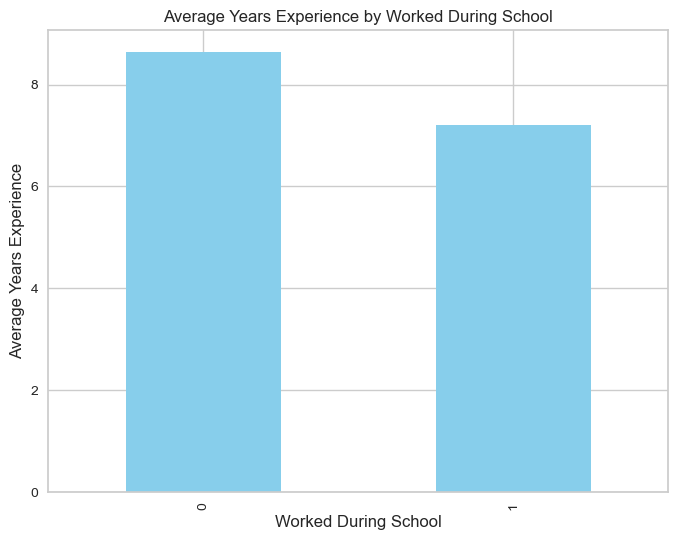

In [26]:
# Group by 'years_college' and calculate the mean of 'college_degree' for each year
average_degree_by_year = df.groupby('worked_during_school')['years_experience'].mean()
# Let's create a bar plot
plt.figure(figsize=(8, 6))
average_degree_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Worked During School')
plt.ylabel('Average Years Experience')
plt.title('Average Years Experience by Worked During School')

plt.show()

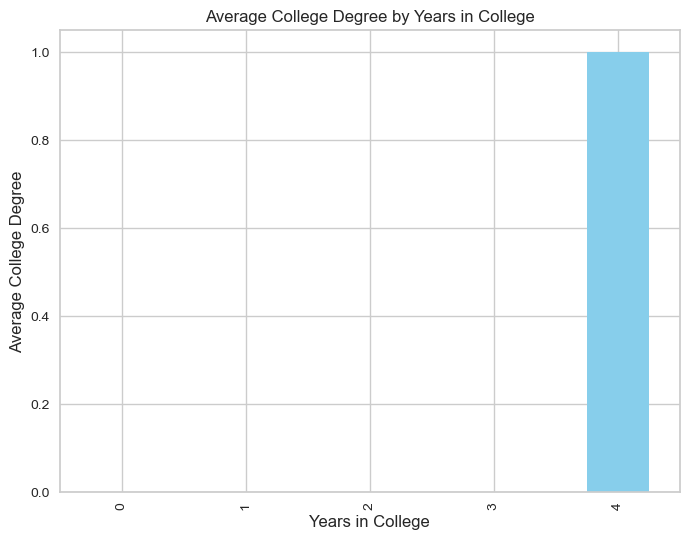

In [27]:
# Group by 'years_college' and calculate the mean of 'college_degree' for each year
average_degree_by_year = df.groupby('years_college')['college_degree'].mean()
plt.figure(figsize=(8, 6))
average_degree_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Years in College')
plt.ylabel('Average College Degree')
plt.title('Average College Degree by Years in College')

plt.show()

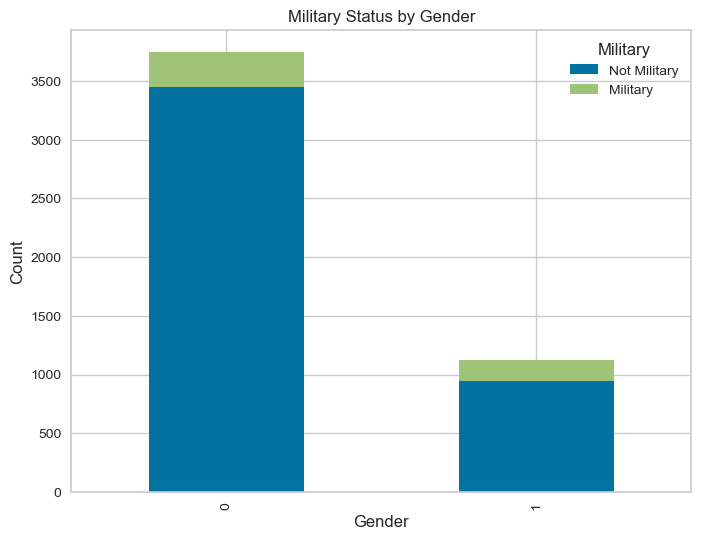

In [28]:
# Group by gender and military status, and calculate the sum
grouped_data = df.groupby(by=['gender', 'military'])['military'].count().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Military Status by Gender')
plt.legend(title='Military', labels=['Not Military', 'Military'])

plt.show()

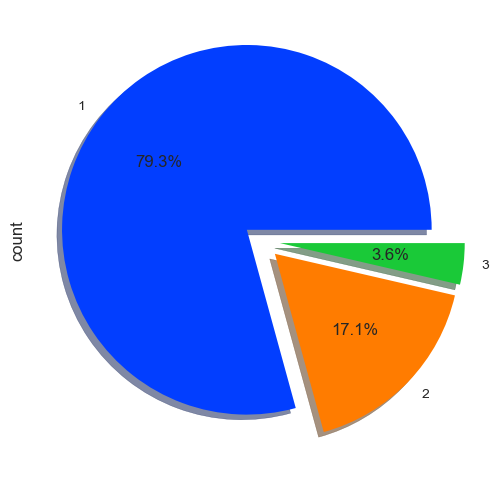

In [29]:
#Let's look at years degrees in pie chart
df['years_degrees'].value_counts().plot.pie(explode=[0.1,0.1,0.1], 
                                          autopct='%1.1f%%', shadow=True, 
                                          figsize=(6,6), colors=sns.color_palette('bright'));

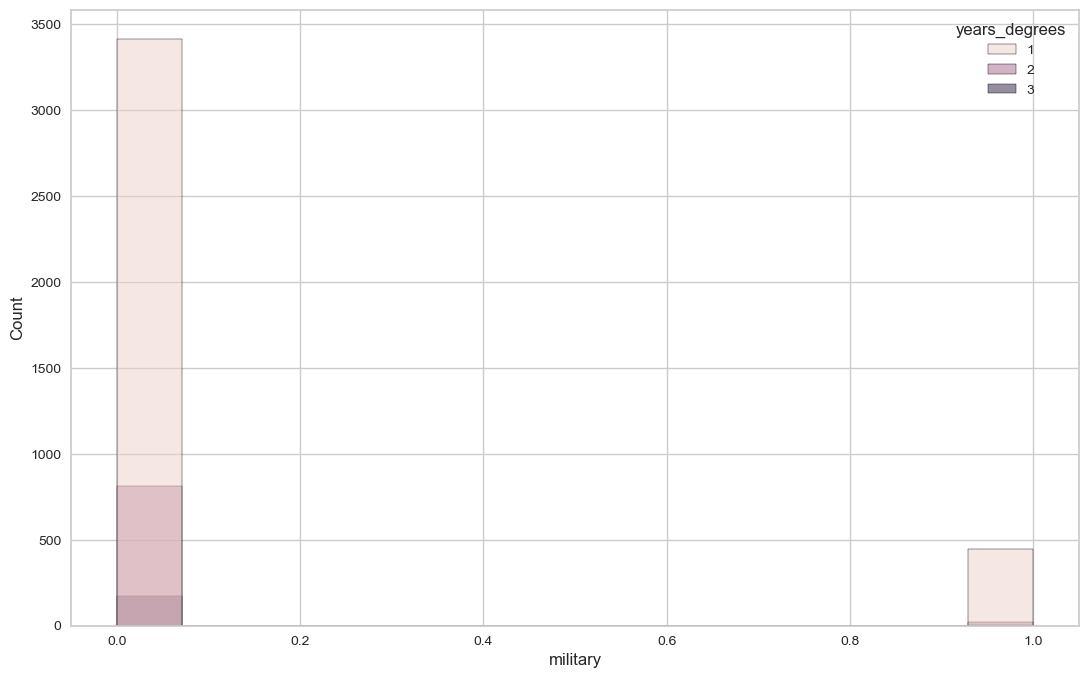

In [30]:
#Let's visualize military by years degree
plt.figure(figsize=(13,8))
sns.histplot(x=df['military'], hue=df['years_degrees']);

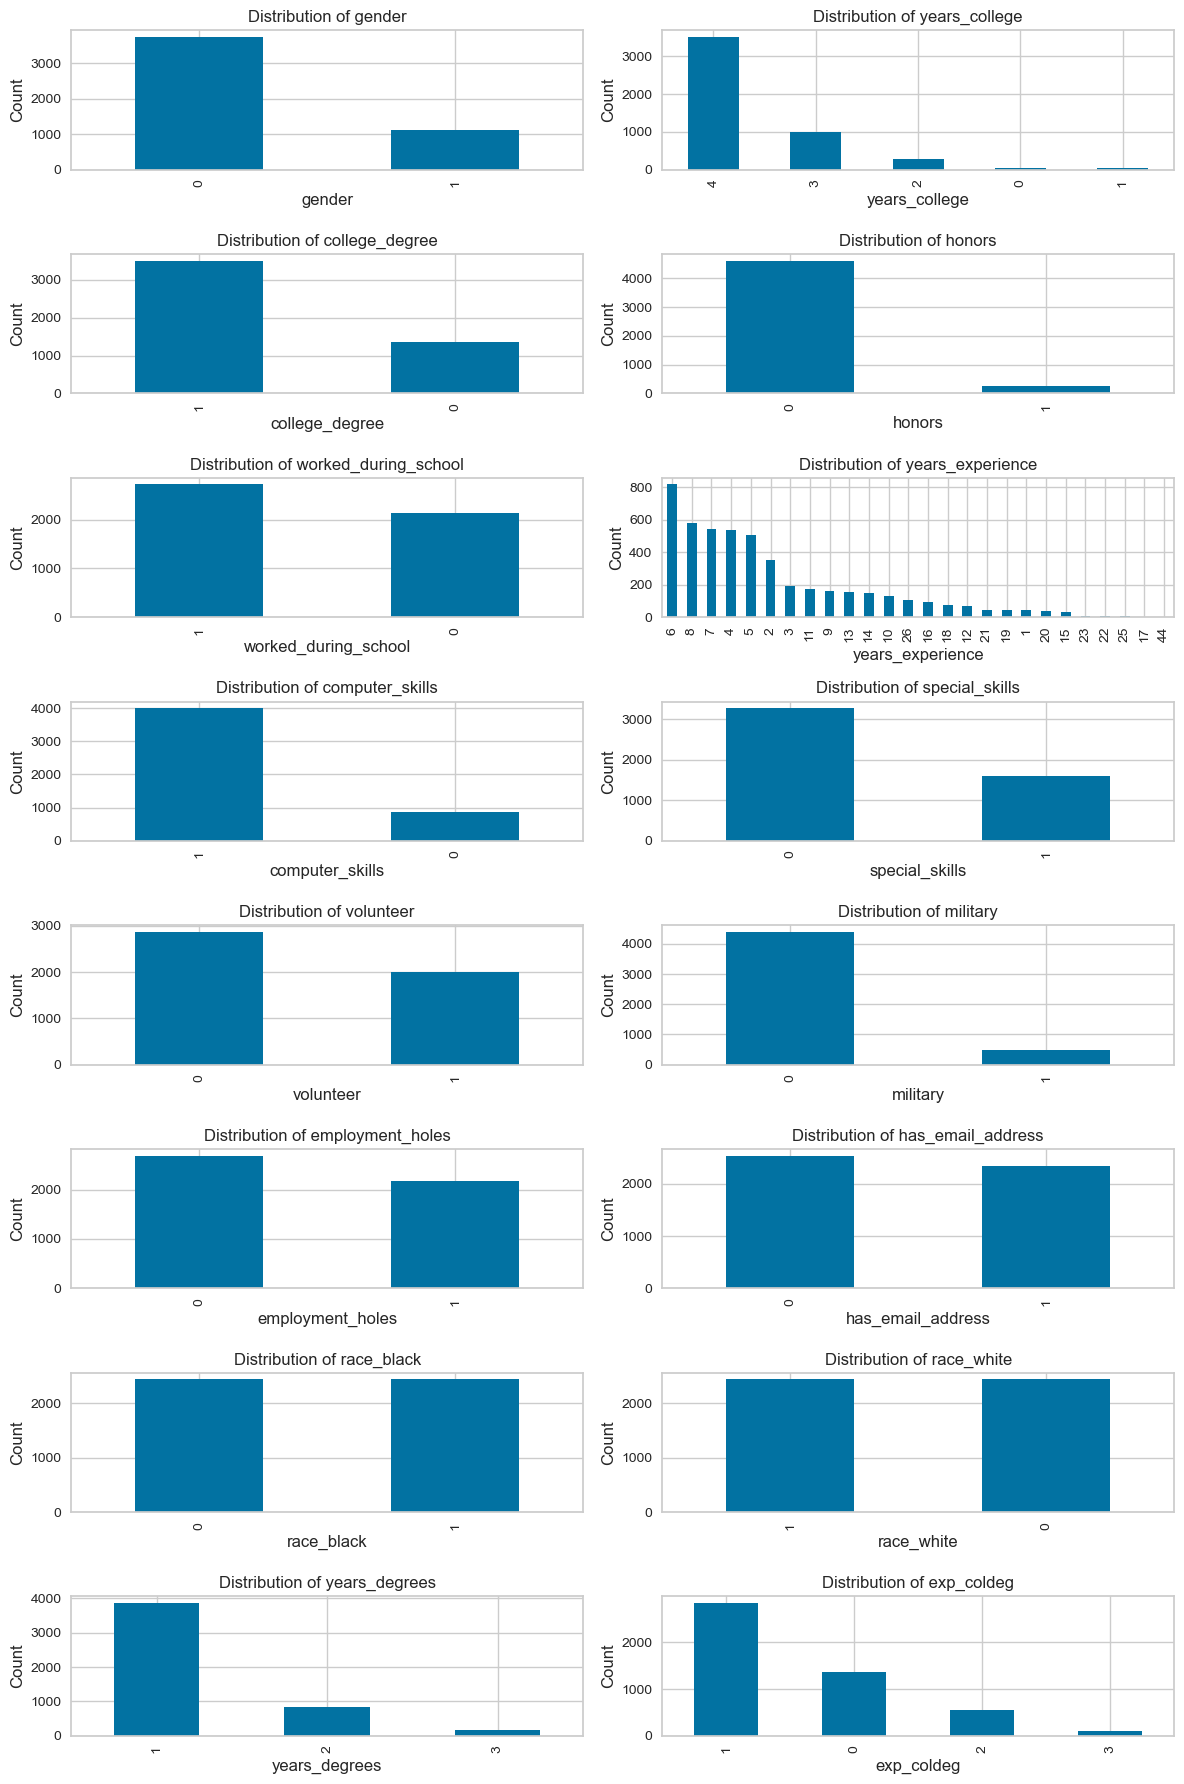

In [31]:
#Let's create barplot for categorical columns
num_cols = df.shape[1]
n_cols = 2  # Number of columns in the subplot grid
n_rows = (num_cols + 1) // n_cols  # +1 to account for uneven number of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 18))
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()
for i, col in enumerate(df.columns):
    ax = axes[i]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
if num_cols % n_cols != 0:
    fig.delaxes(axes[num_cols])
plt.tight_layout()

plt.show()

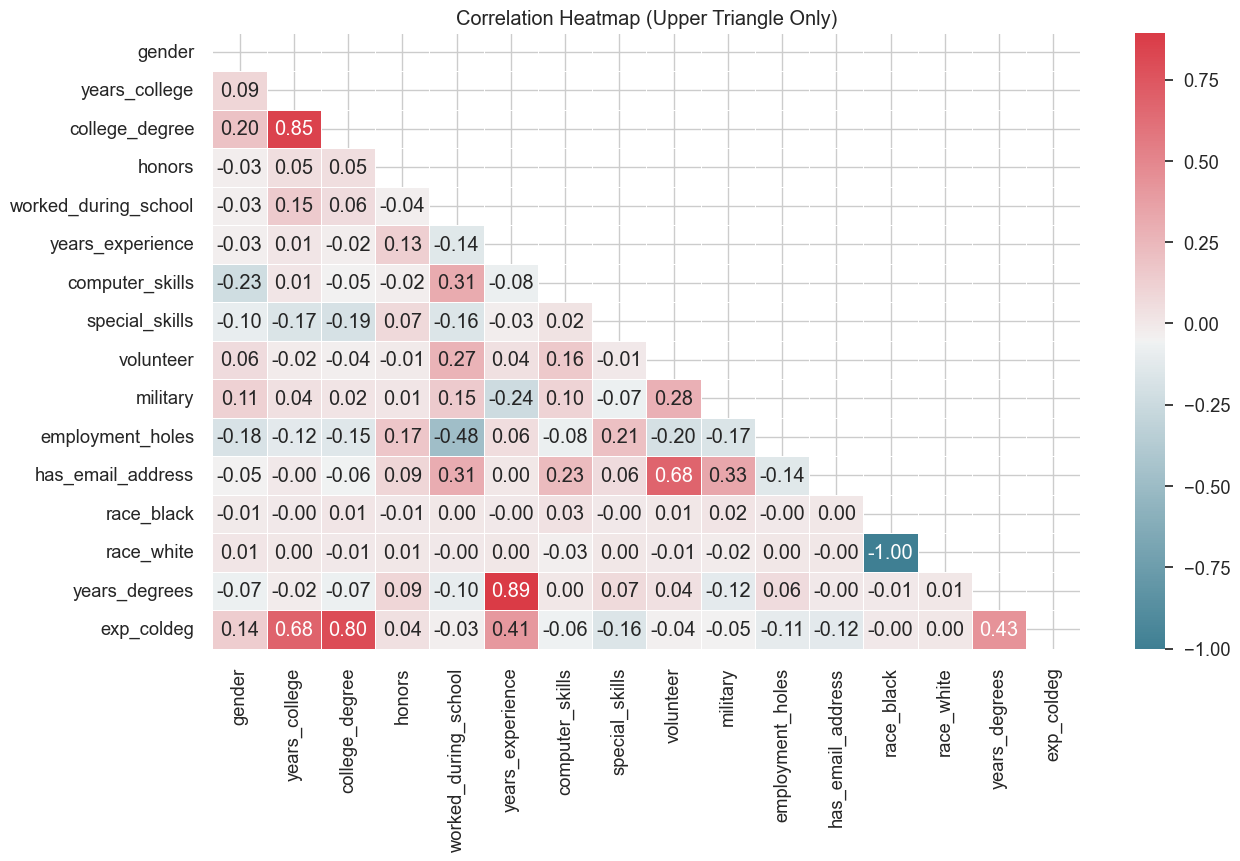

In [32]:
# Let's look at correlations
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
custom_palette = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=custom_palette, linewidths=0.5, cbar=True, mask=mask)
plt.title('Correlation Heatmap (Upper Triangle Only)')

plt.show()

In [33]:
#VIF score 
vif_scores = pd.DataFrame()
vif_scores["Variable"] = df.columns[:-1]
vif_scores["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1] - 1)]
vif_scores

Variable        VIF
0                 gender   1.188060
1          years_college   4.047381
2         college_degree  11.000181
3                 honors   1.101833
4   worked_during_school   1.658070
5       years_experience   6.457662
6        computer_skills   1.225576
7         special_skills   1.182782
8              volunteer   1.963141
9               military   1.372523
10      employment_holes   1.484627
11     has_email_address   2.211991
12            race_black  39.261423
13            race_white  39.380144
14         years_degrees   8.755258

In [34]:
# Let's look at columns with vif value greater than 10
vif_scores[vif_scores['VIF'] > 10]

Variable        VIF
2   college_degree  11.000181
12      race_black  39.261423
13      race_white  39.380144

# 9) Dimensionality Reduction

In [35]:
#Let's find pca with 3 components
p = PCA(n_components=3)
p.fit(df)

PCA(n_components=3)

In [36]:
w = p.components_.T

In [37]:
pd.DataFrame(w,index = df.columns , columns = ['W1','W2','W3'])

W1        W2        W3
gender               -0.002772 -0.080095  0.004309
years_college         0.002350 -0.670361  0.014387
college_degree       -0.001578 -0.427086 -0.036305
honors                0.005763 -0.001850 -0.006518
worked_during_school -0.013857 -0.079377  0.460041
years_experience      0.994146  0.030680  0.014359
computer_skills      -0.006062  0.006004  0.193496
special_skills       -0.002325  0.118732 -0.074743
volunteer             0.003830  0.015234  0.525046
military             -0.013996 -0.018827  0.149099
employment_holes      0.005535  0.113634 -0.356860
has_email_address    -0.000076  0.033387  0.541392
race_black           -0.000274  0.001073  0.088719
race_white            0.000274 -0.001073 -0.088719
years_degrees         0.089501  0.004821  0.007014
exp_coldeg            0.056024 -0.570771 -0.096924

In [38]:
#Variances
p.explained_variance_

array([25.74678759,  0.99712034,  0.53437841])

In [39]:
#Ratio
p.explained_variance_ratio_

array([0.8860507 , 0.03431493, 0.01839011])

In [40]:
#Ratio df
pd.DataFrame(p.explained_variance_ratio_ , index = range(1,4),  columns = ['Explained Variability'])

Explained Variability
1               0.886051
2               0.034315
3               0.018390

In [41]:
#Cumulative sum
p.explained_variance_ratio_.cumsum()

array([0.8860507 , 0.92036563, 0.93875574])

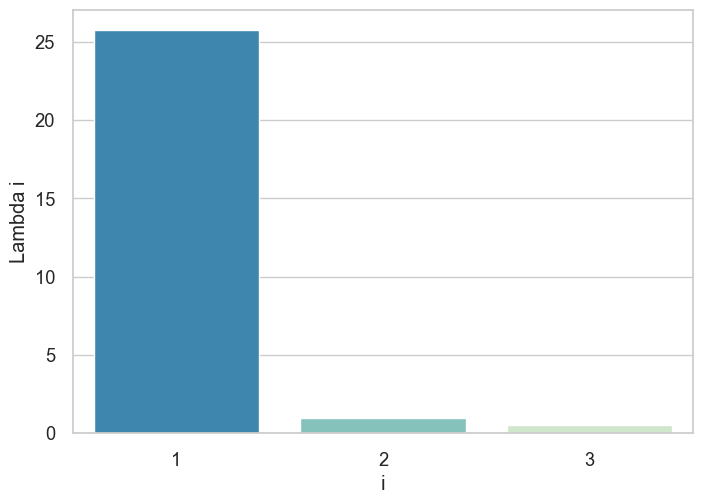

In [42]:
#Let's create bar plot from explained variances
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [43]:
#Let's create data frame from pca
df_PCA = pd.DataFrame(p.transform(df), columns=(['col1', 'col2', 'col3']))

In [44]:
#Let's find pca describtion
df_PCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  4870.0 -2.334432e-17  5.074129 -6.893488 -2.901439 -1.832203  1.136008   
col2  4870.0  5.836080e-18  0.998559 -1.300754 -0.629059 -0.491467  1.041306   
col3  4870.0 -2.553285e-17  0.731012 -1.344725 -0.629510 -0.024710  0.630500   

            max  
col1  36.222172  
col2   3.648180  
col3   1.567802

In [45]:
#Let's define x , y and z
x = df_PCA['col1']
y = df_PCA['col2']
z = df_PCA['col3']

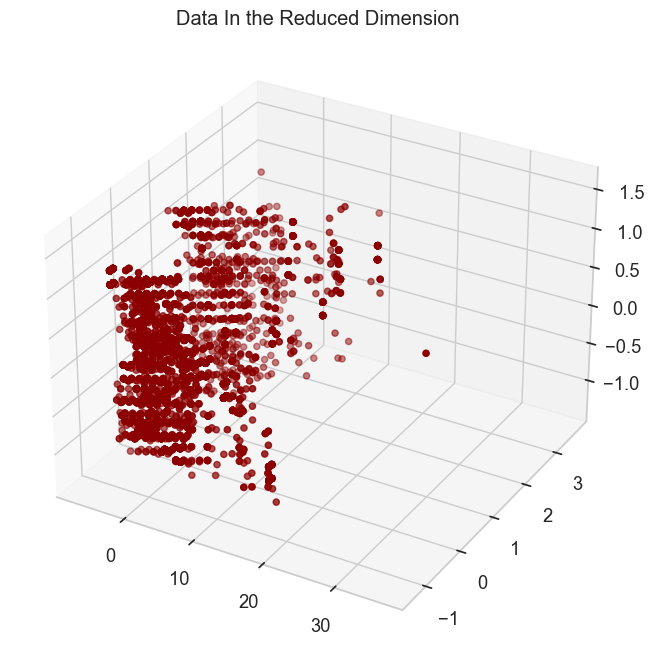

In [46]:
#Let's visualize x ,y and z
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('Data In the Reduced Dimension')
plt.show()

In [47]:
del df['years_experience']

# 10) Clustering

### · Kmeans

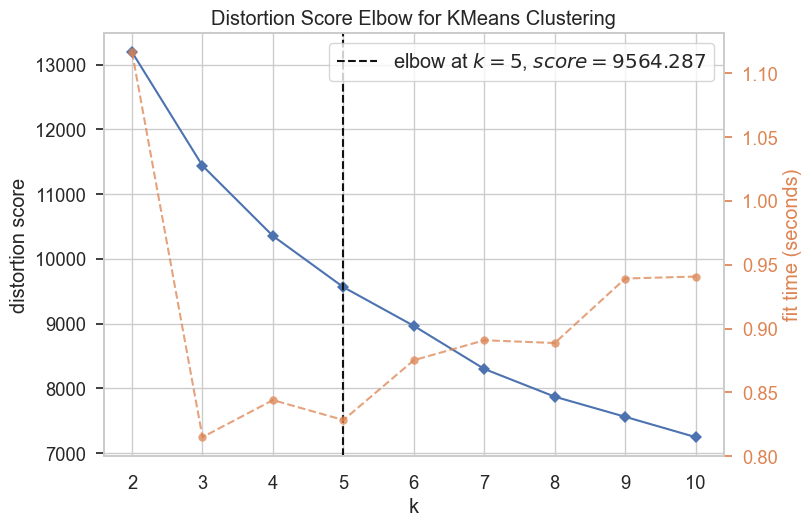

In [48]:
#Let's show components in visual with elbow methods 
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show();

In [49]:
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_PCA)
df_PCA['Clusters'] = yhat_AC
df['Clusters'] = yhat_AC

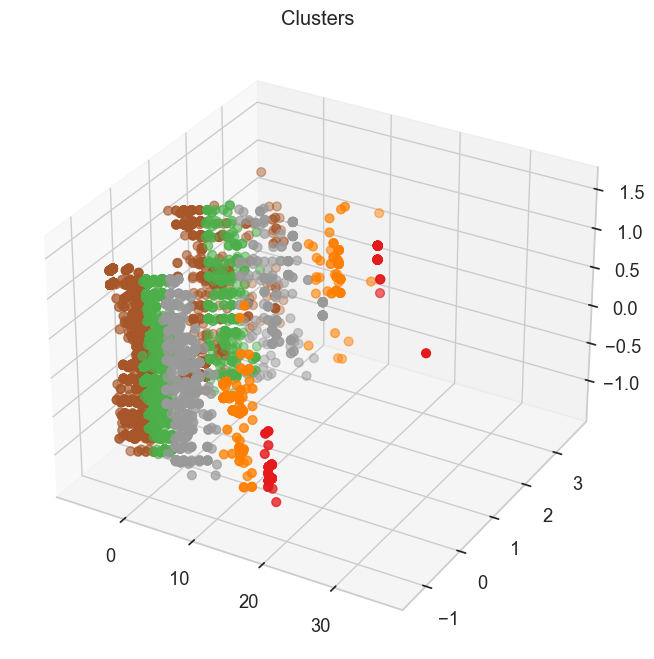

In [50]:
#Let's show clusters in 3d
fig = plt.figure(figsize=(14,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=df_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

# 11) Clusters Analysis and Customers Profiling

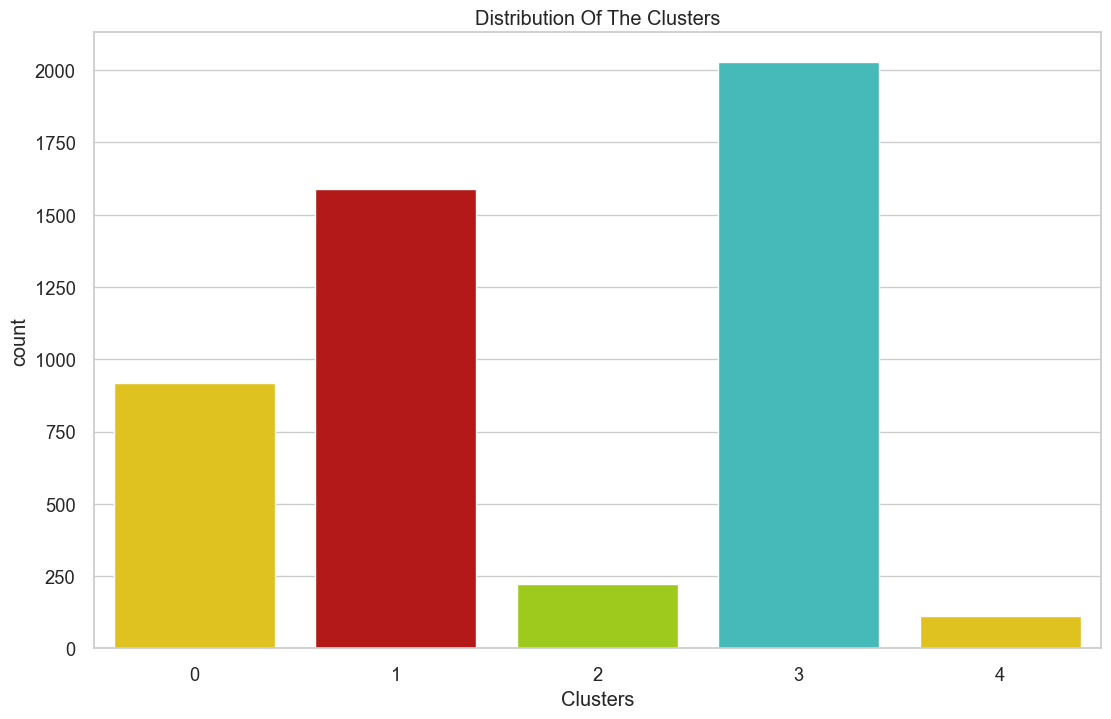

In [51]:
#Let's show clusters with bar chart
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=df['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

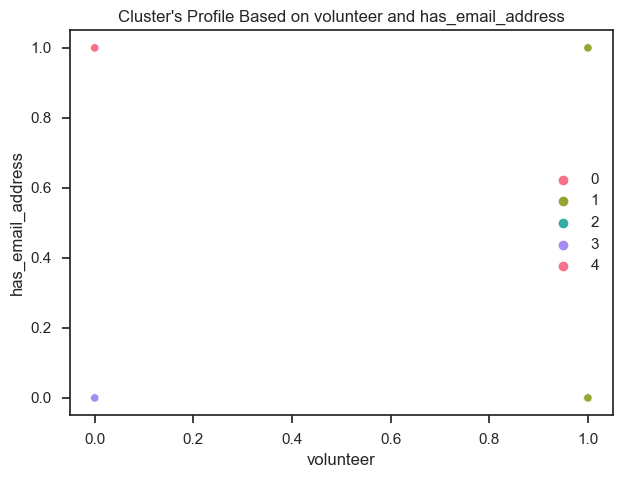

In [130]:
#Let's look at basic visual between "volunteer" and "has_email_address"
plt.figure(figsize=(7,5))
pl = sns.scatterplot(data=df, x=df['volunteer'], y=df['has_email_address'], hue=df['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on volunteer and has_email_address")
plt.legend();

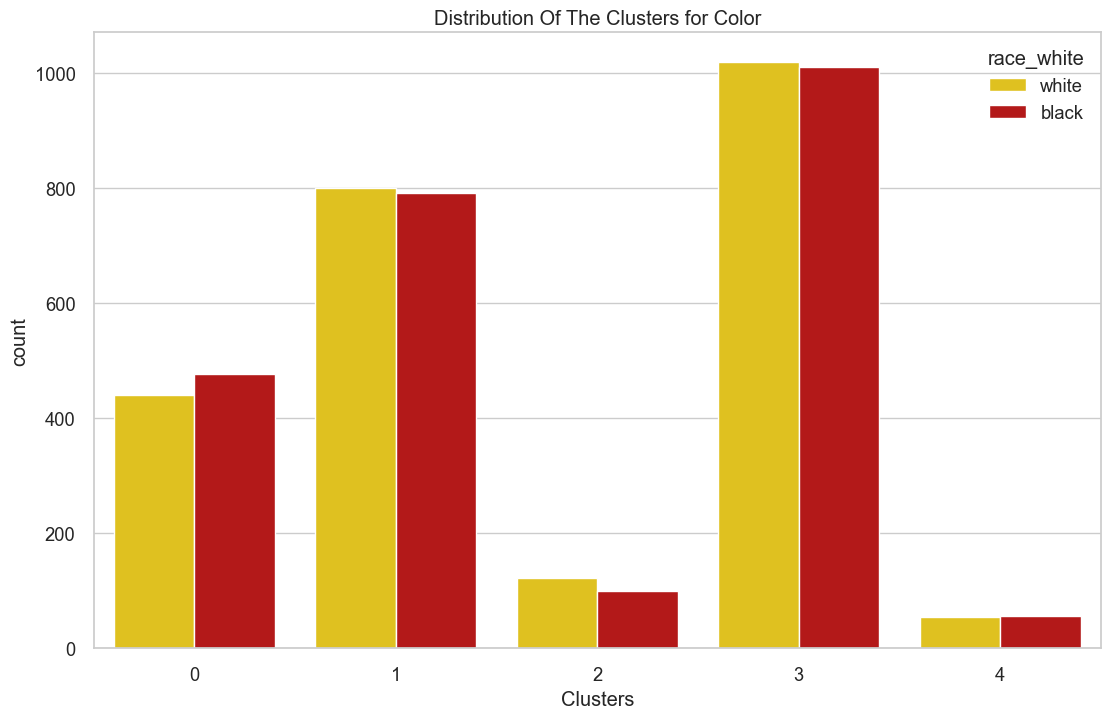

In [53]:
#Let's look at clusters by race white or black
pal = ['gold', '#cc0000', '#ace600', '#33cccc']
a = df['race_white'].apply(lambda x: 'white' if x == 1 else 'black')

plt.figure(figsize=(13, 8))
pl = sns.countplot(x='Clusters', data=df, hue=a, palette=pal)
pl.set_title('Distribution Of The Clusters for Color')
plt.show()

#### Visualization

<Figure size 1300x800 with 0 Axes>

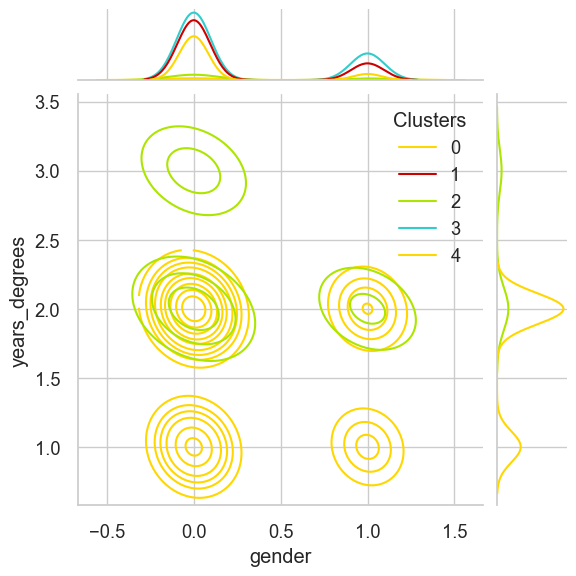

<Figure size 1300x800 with 0 Axes>

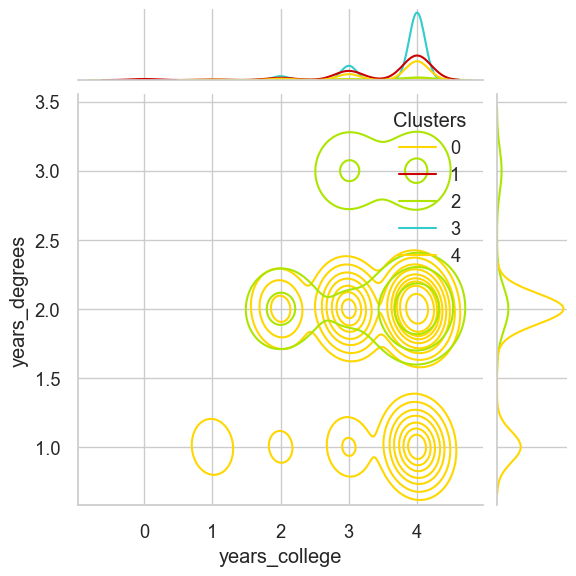

<Figure size 1300x800 with 0 Axes>

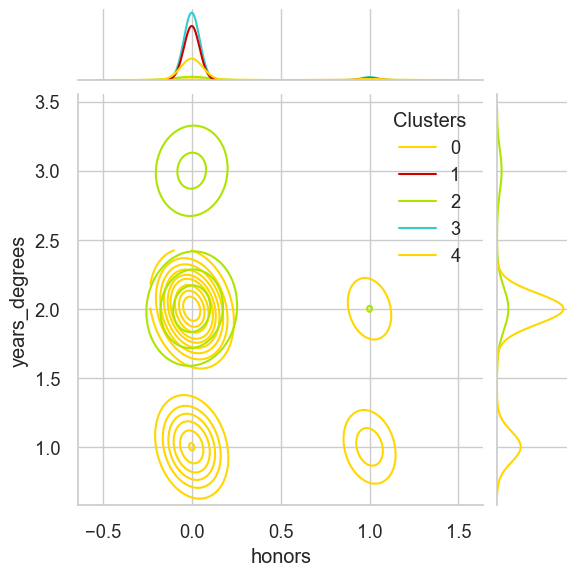

<Figure size 1300x800 with 0 Axes>

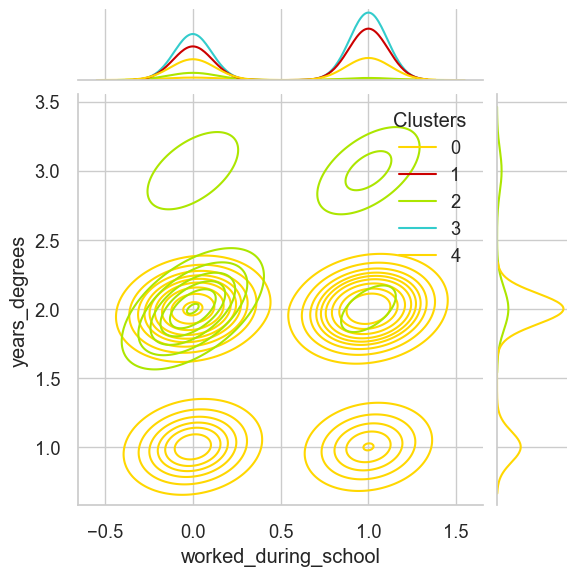

<Figure size 1300x800 with 0 Axes>

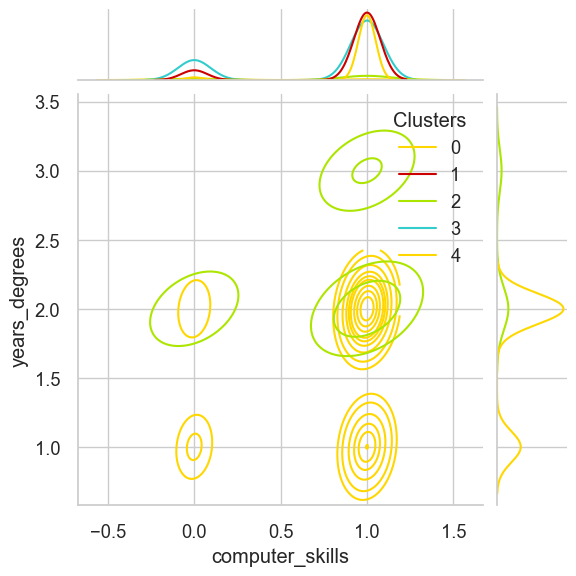

<Figure size 1300x800 with 0 Axes>

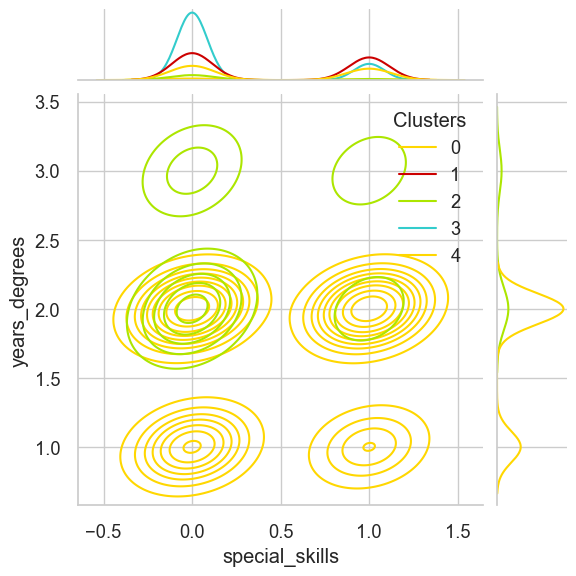

<Figure size 1300x800 with 0 Axes>

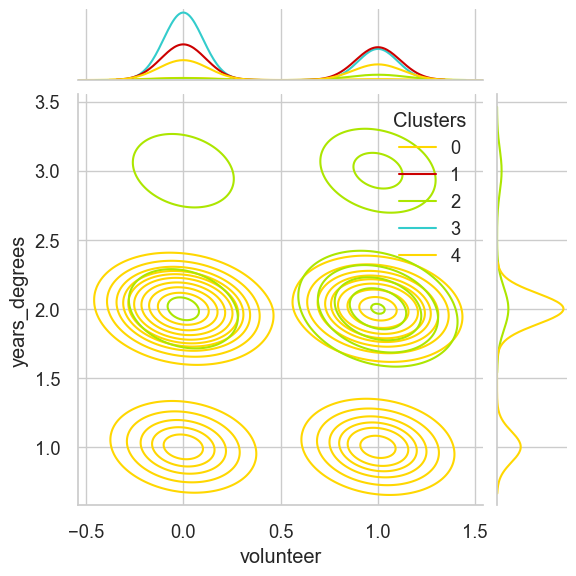

<Figure size 1300x800 with 0 Axes>

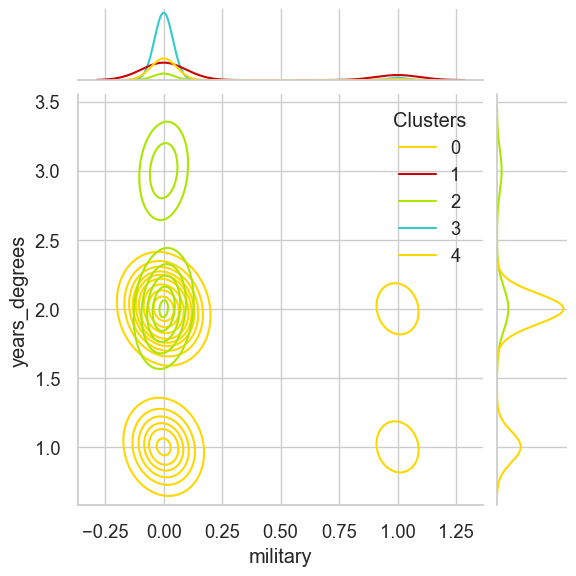

<Figure size 1300x800 with 0 Axes>

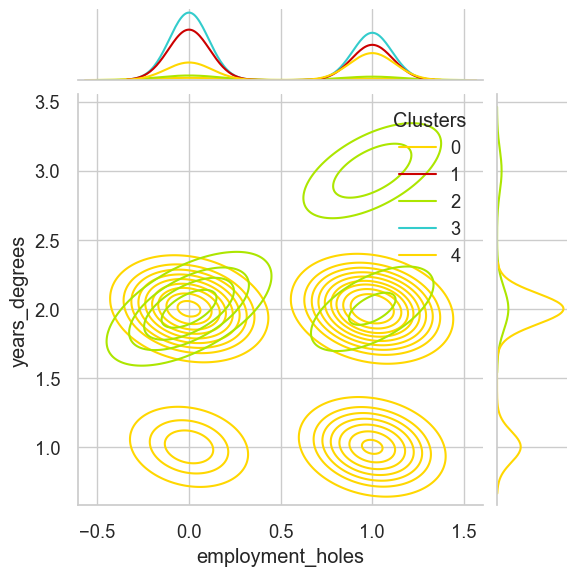

<Figure size 1300x800 with 0 Axes>

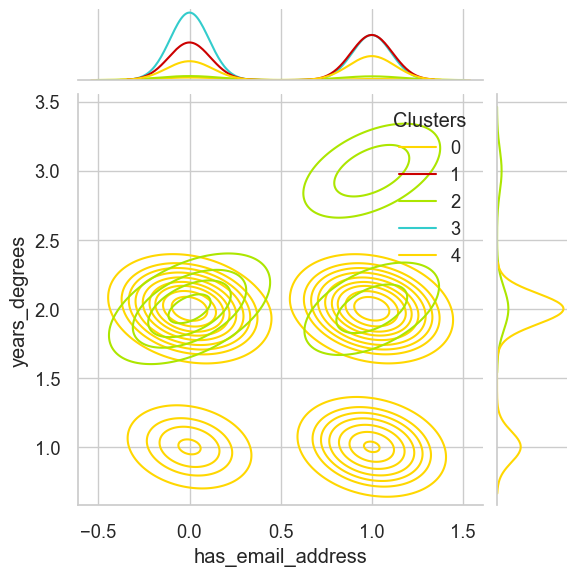

<Figure size 1300x800 with 0 Axes>

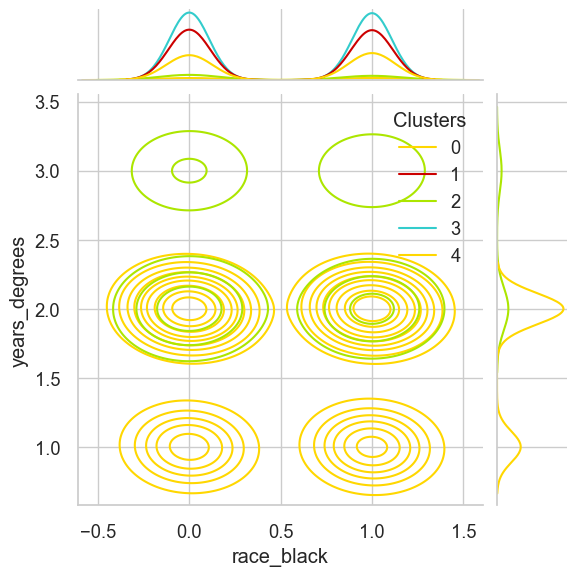

<Figure size 1300x800 with 0 Axes>

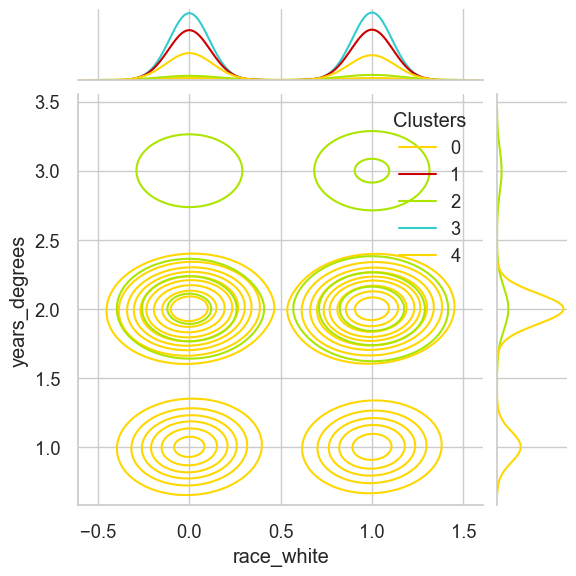

<Figure size 1300x800 with 0 Axes>

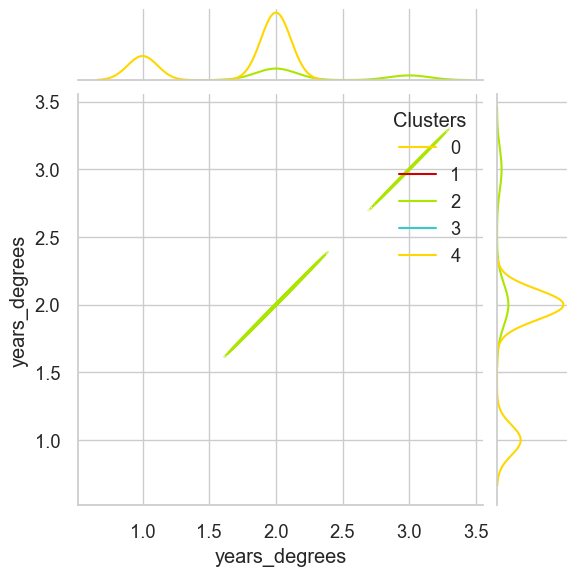

<Figure size 1300x800 with 0 Axes>

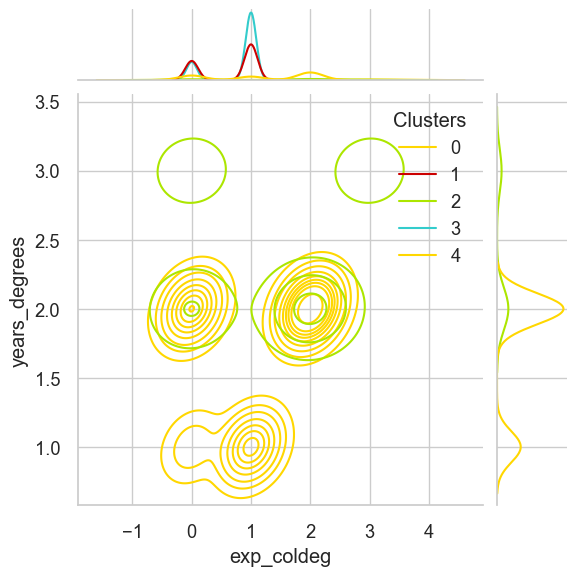

In [54]:
# Let's look at distribution all columns
Personal = ['gender', 'years_college', 'honors',
       'worked_during_school', 'computer_skills', 'special_skills',
       'volunteer', 'military', 'employment_holes', 'has_email_address',
       'race_black', 'race_white', 'years_degrees', 'exp_coldeg']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=df[i], y=df['years_degrees'], hue=df['Clusters'], kind='kde', palette=pal);

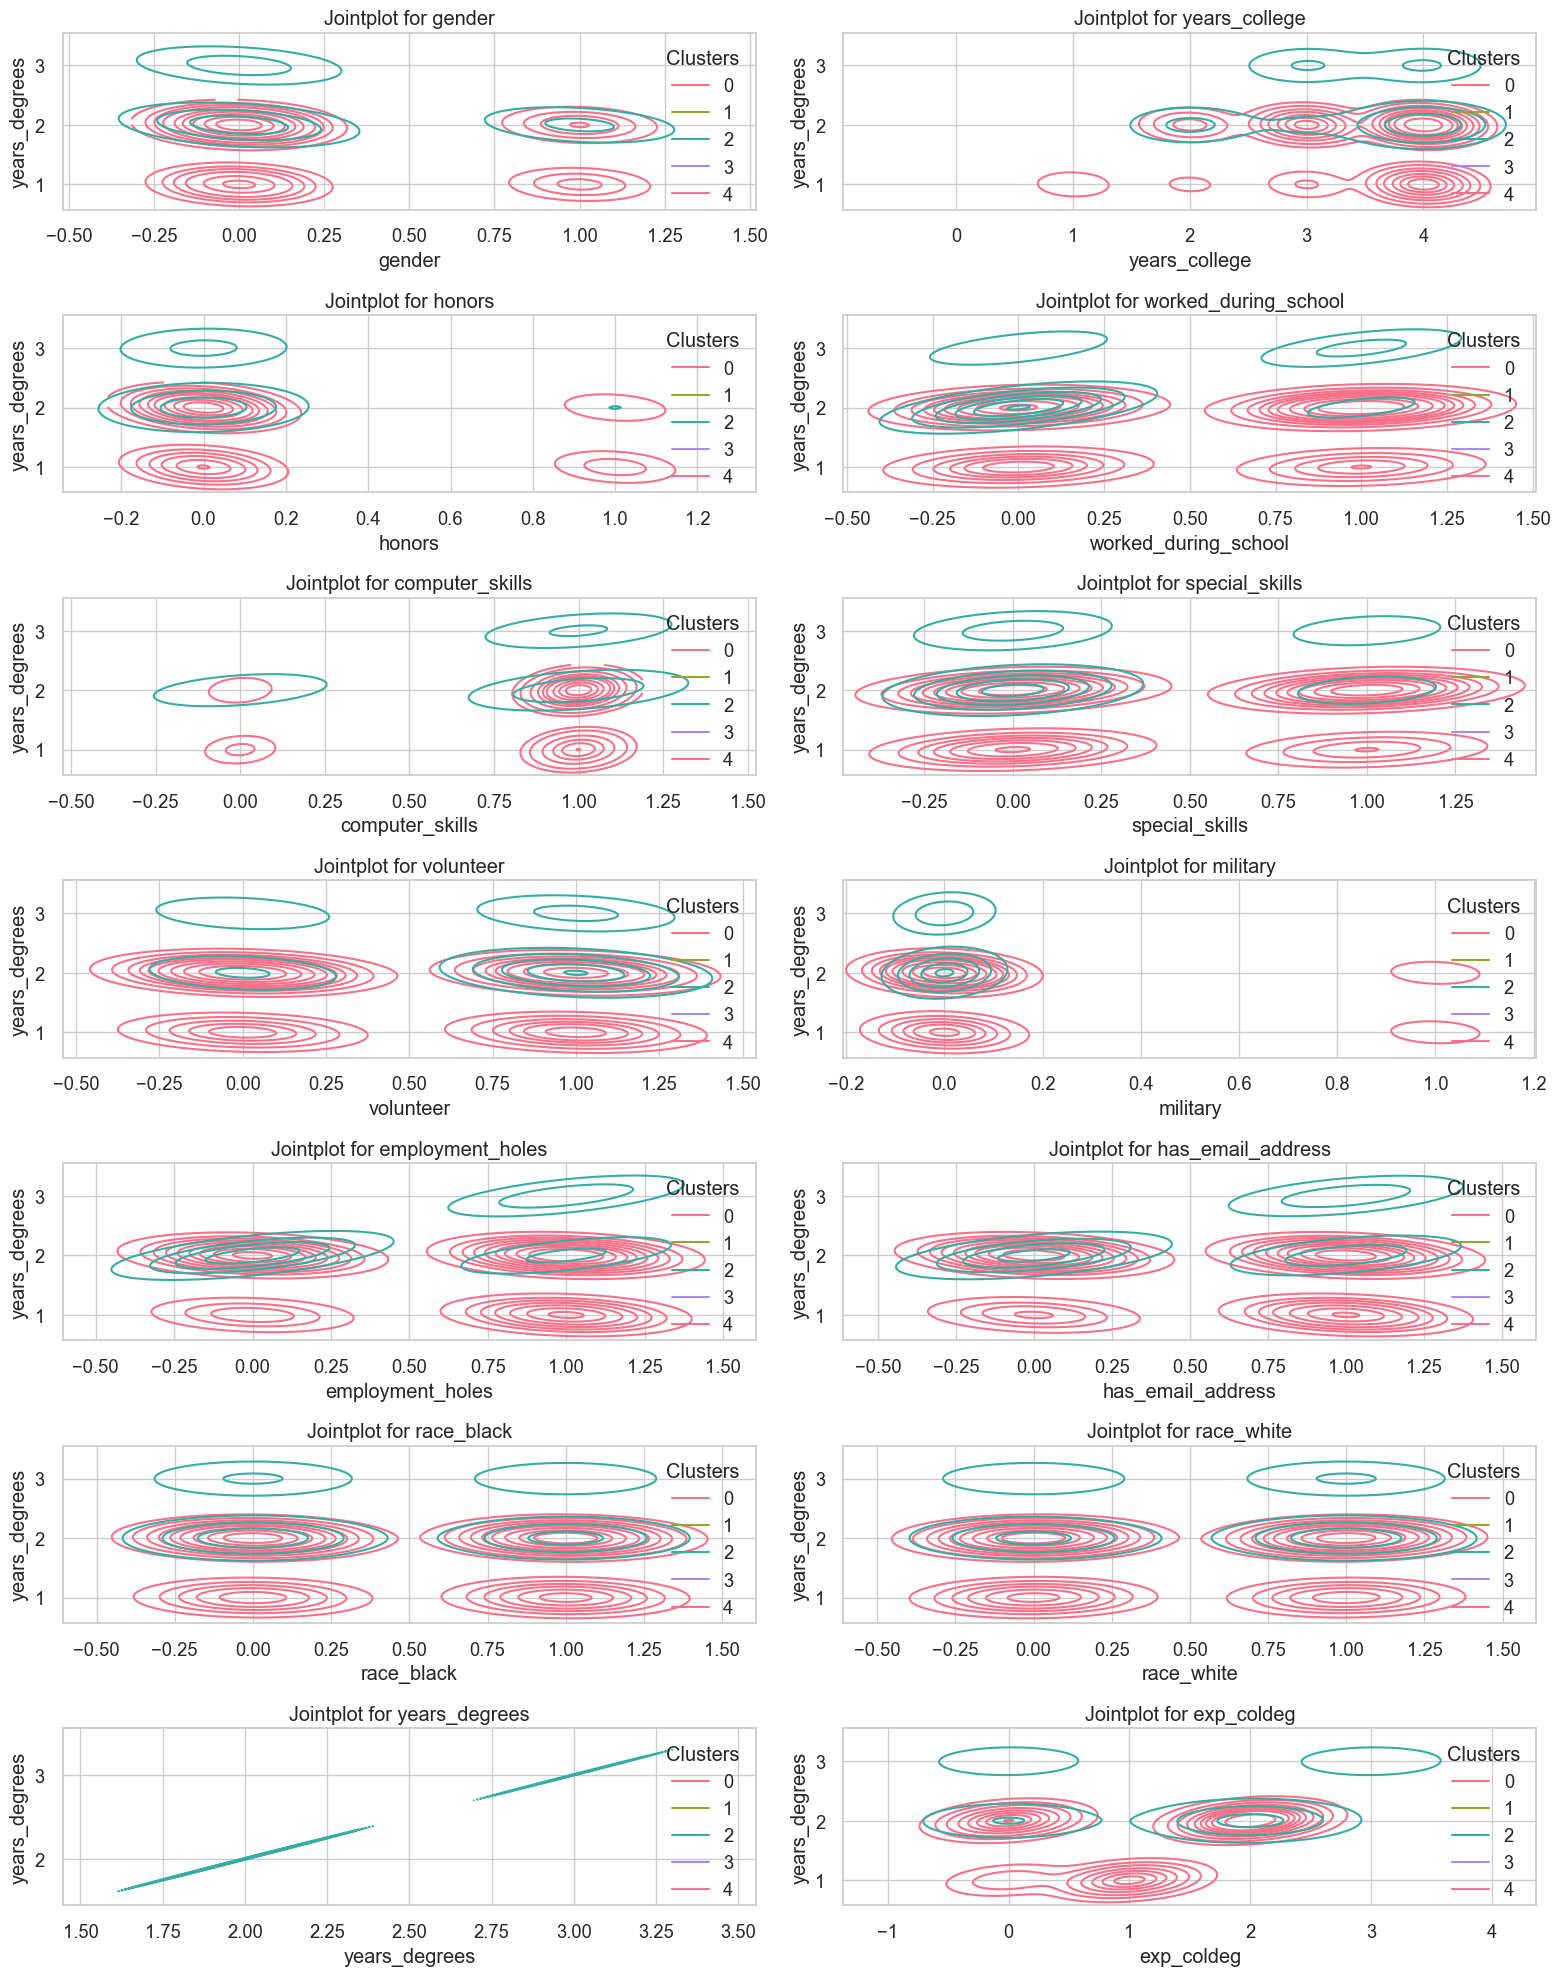

In [55]:
# Let's create charts which description our features distribution in subplot
Personal = ['gender', 'years_college', 'honors', 'worked_during_school', 'computer_skills', 'special_skills', 'volunteer', 'military', 'employment_holes', 'has_email_address', 'race_black', 'race_white', 'years_degrees', 'exp_coldeg']
pal = sns.color_palette("husl", as_cmap=True)
fig, axes = plt.subplots(len(Personal) // 2, 2, figsize=(16, 20))
axes = axes.flatten()
for i, attr in enumerate(Personal):
    sns.kdeplot(data=df, x=attr, y='years_degrees', hue='Clusters', ax=axes[i], palette=pal)
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('years_degrees')
    axes[i].set_title(f'Jointplot for {attr}')
plt.tight_layout()

plt.show()

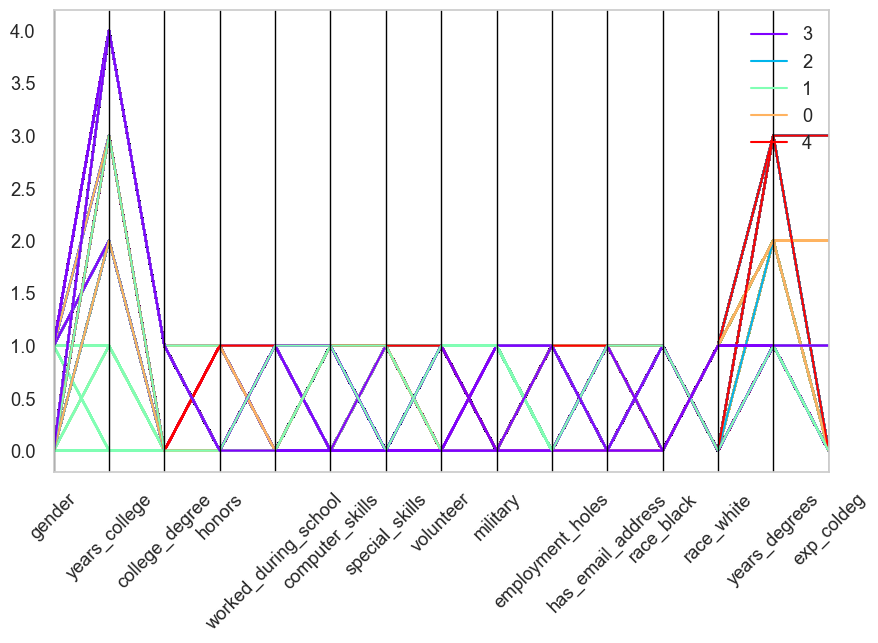

In [56]:
# Create a Parallel Coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'Clusters', colormap='rainbow')
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


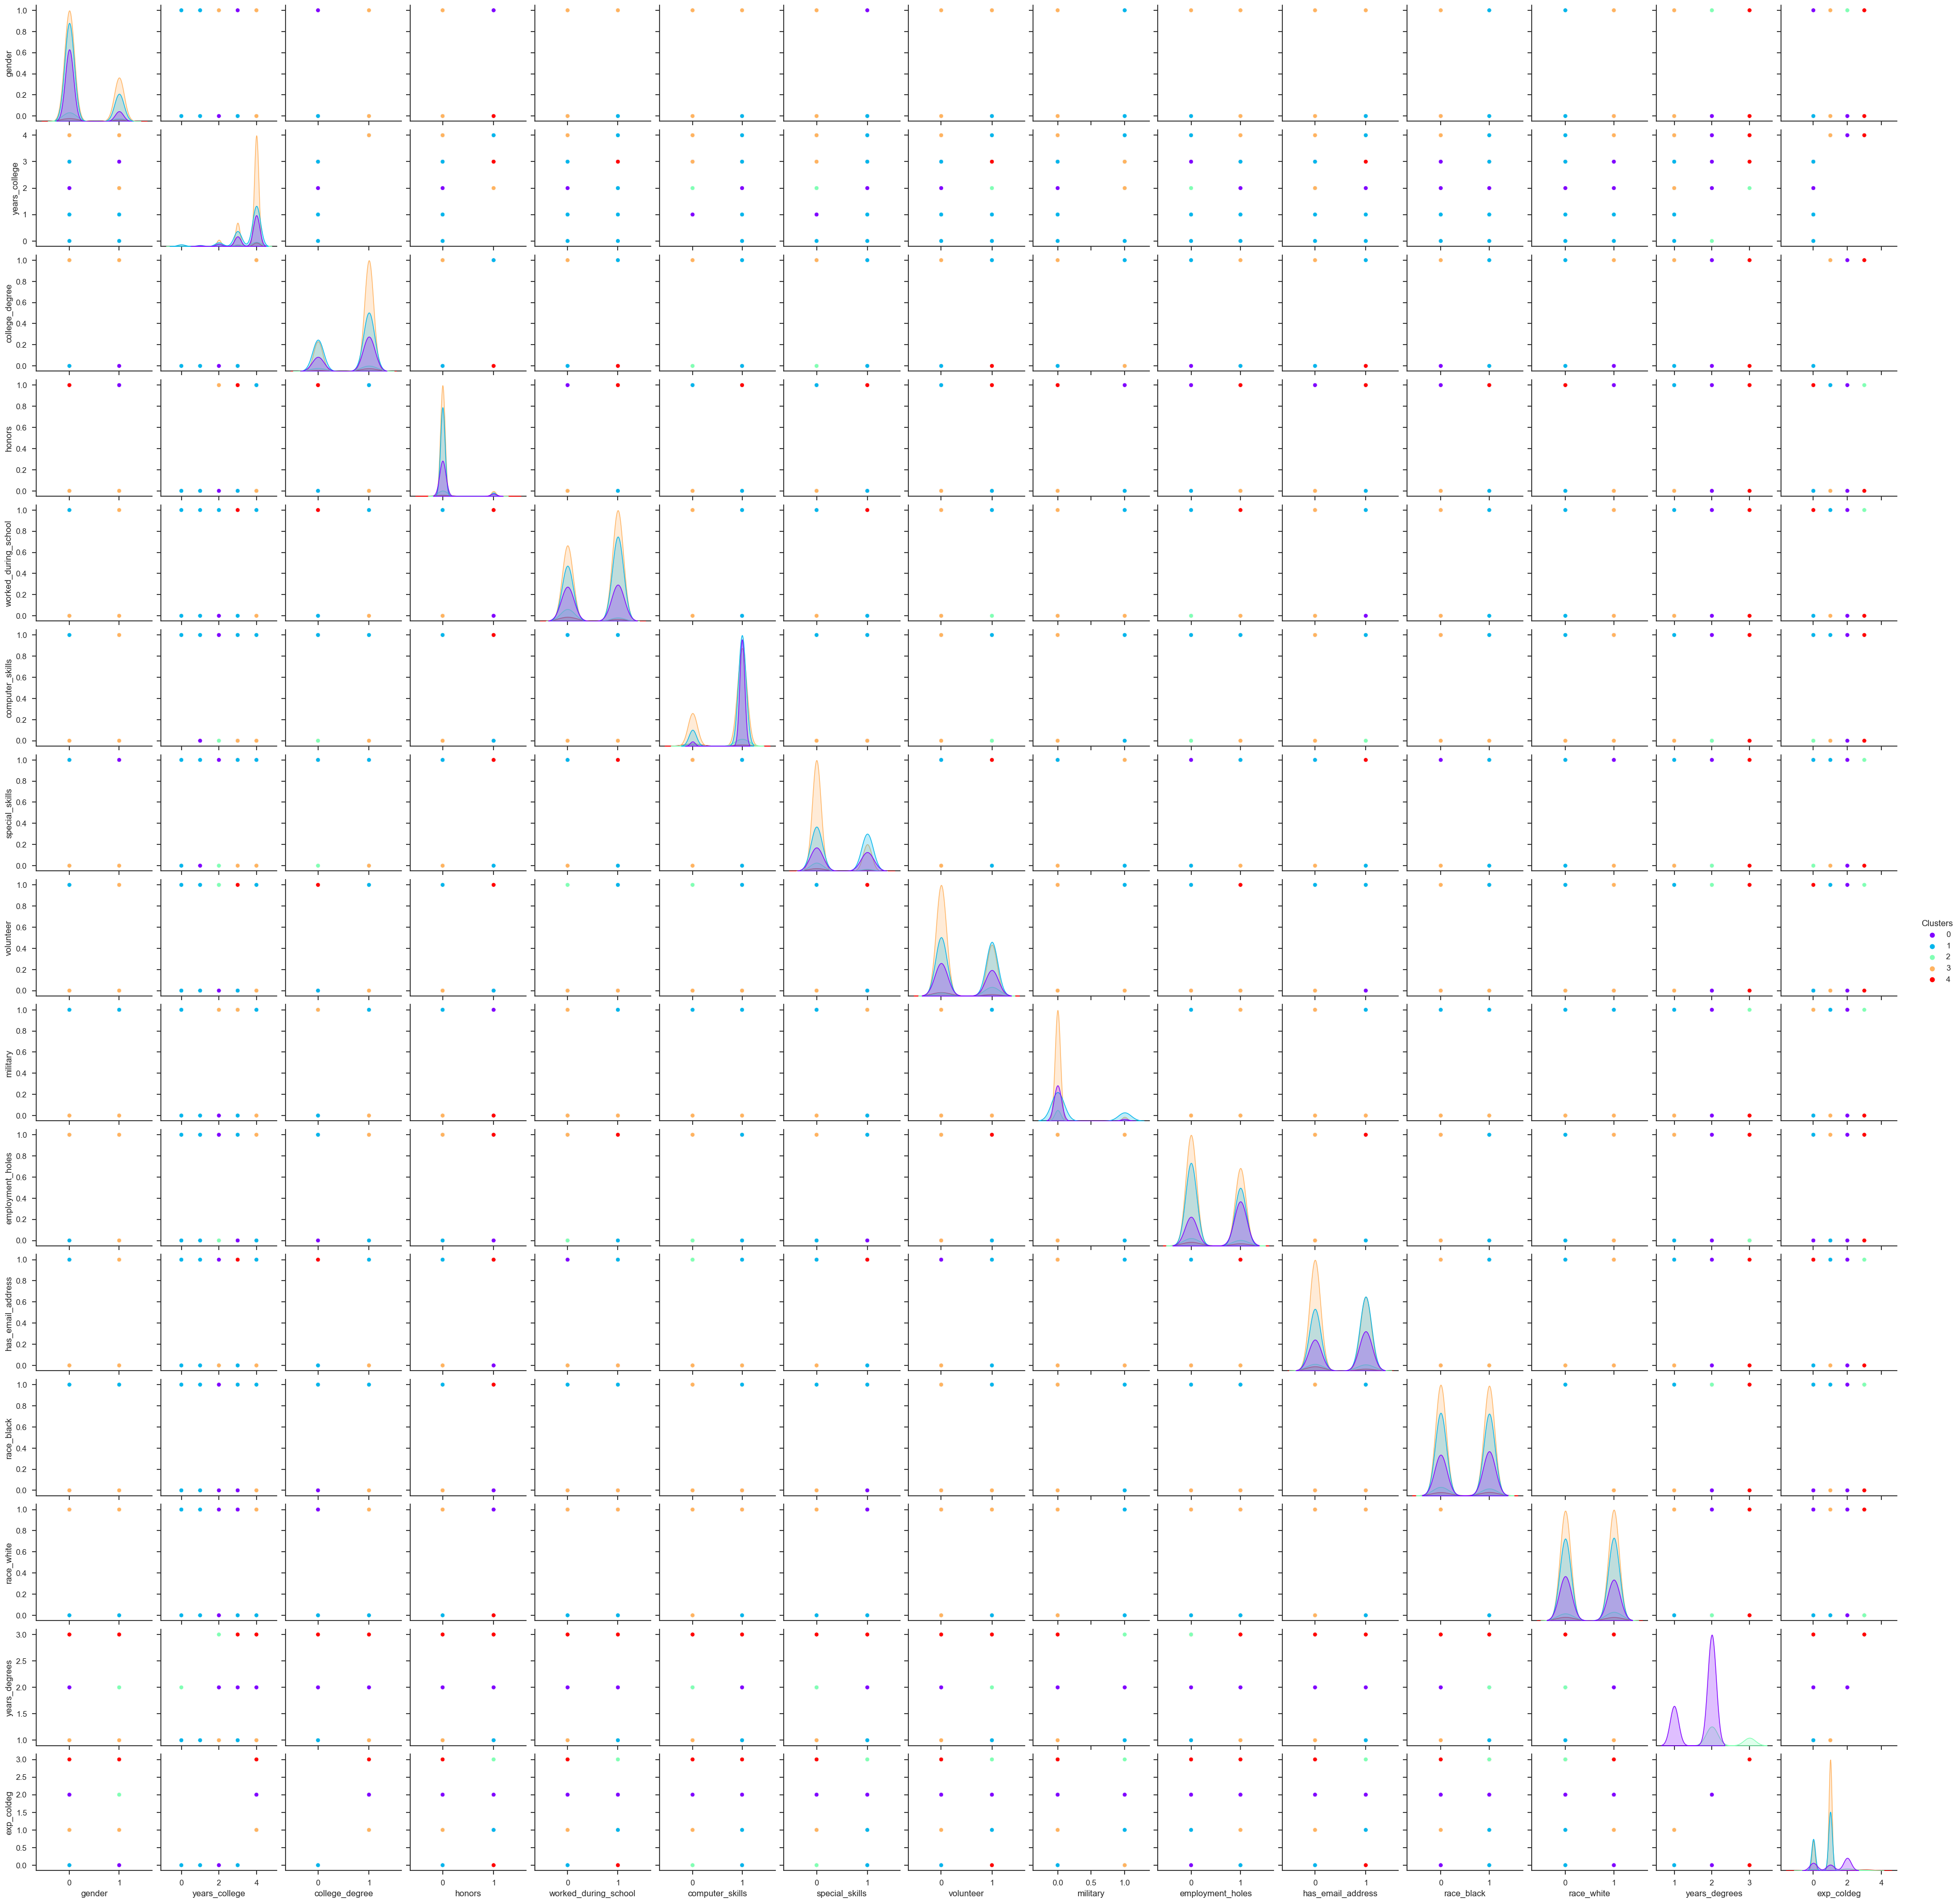

In [57]:
# Create scatter plots for combinations of columns
sns.set(style="ticks")
sns.pairplot(df, hue='Clusters', diag_kind='kde', palette='rainbow')
plt.legend()
plt.show()

In [58]:
#Let's look at cluster row sum
lab_score = {}
for i in range(5):
     score = df[df['Clusters'] == i].iloc[1].sum()
     lab_score[i] = score

In [59]:
#Let's sort by score
lab_score = dict(sorted(lab_score.items(), key=lambda item: item[1]))

In [60]:
#Let's look at dictionary
lab_score
# 1 --> 'Insufficient'
# 3 --> 'Enough'
# 0 --> 'Middle'
# 2 --> 'Good'
# 4 --> 'Excellent'

{1: 11, 3: 13, 0: 14, 2: 14, 4: 17}

<BarContainer object of 5 artists>

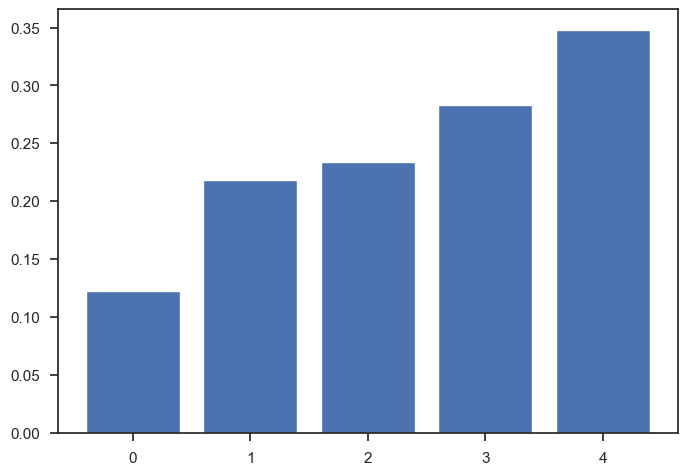

In [61]:
#Let's create subplot for labels
plt.bar(df.groupby(by = 'Clusters')['gender'].mean().index ,list(df.groupby(by = 'Clusters')['gender'].mean()))

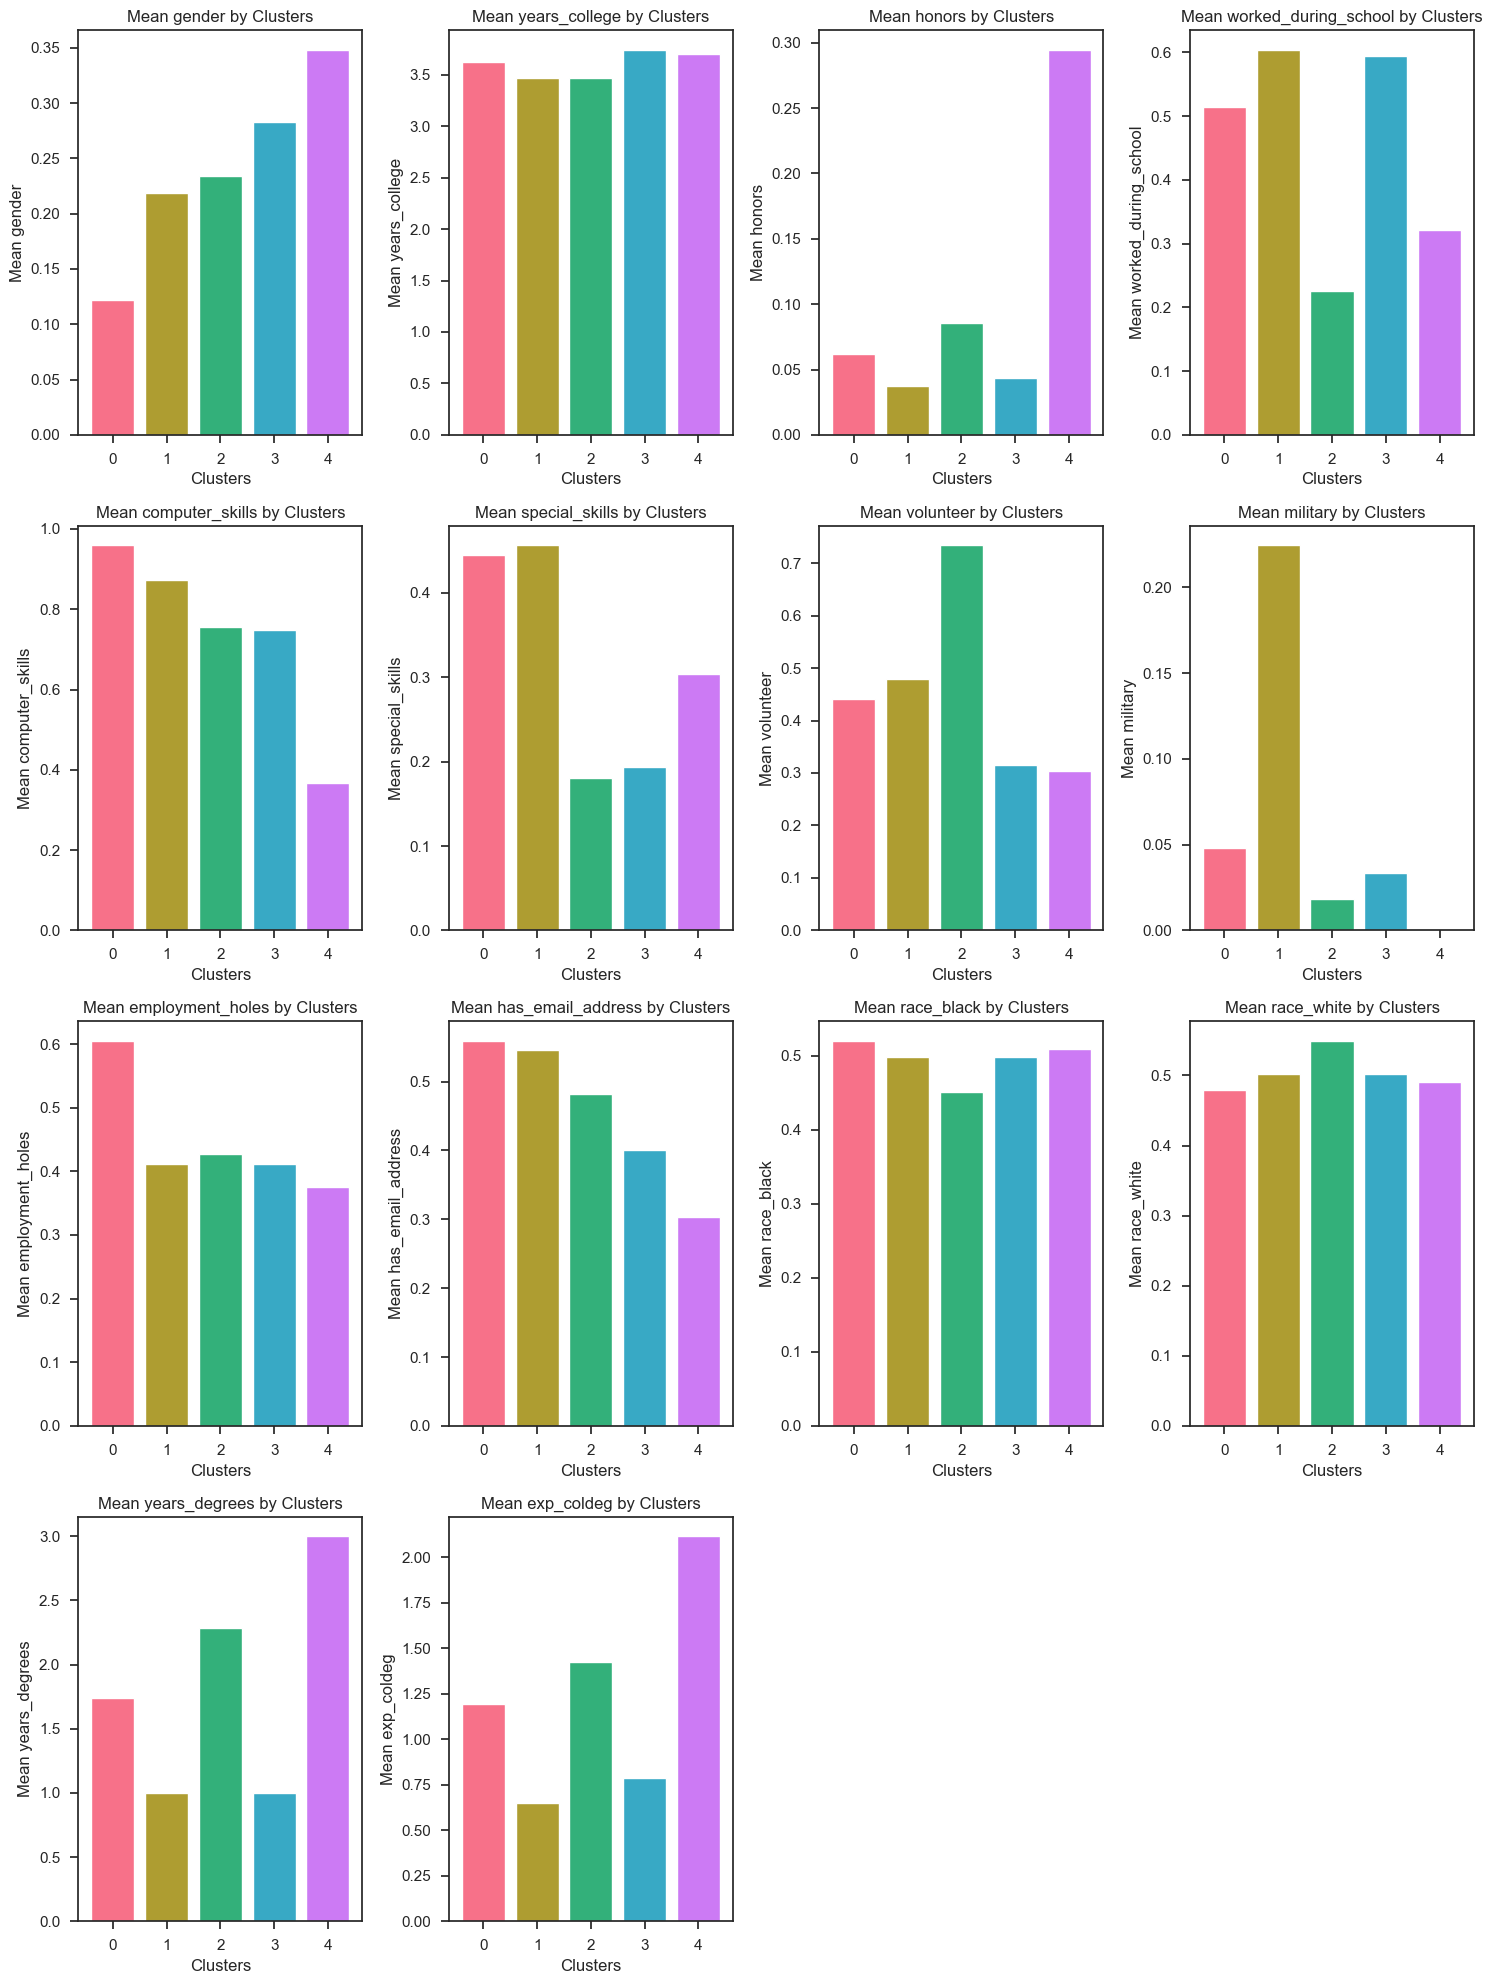

In [63]:
# Create a list of personal attributes
Personal = ['gender', 'years_college', 'honors', 'worked_during_school', 'computer_skills', 'special_skills', 'volunteer', 'military', 'employment_holes', 'has_email_address', 'race_black', 'race_white', 'years_degrees', 'exp_coldeg']
pal = sns.color_palette("husl", as_cmap=True)
columns_per_row = 4
num_columns = len(Personal)
num_rows = (num_columns + columns_per_row - 1) // columns_per_row
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for i, column in enumerate(Personal):
    ax = axes[i]
    mean_values = df.groupby(by='Clusters')[column].mean()
    cluster_colors = sns.color_palette("husl", len(mean_values))
    ax.bar(mean_values.index, mean_values.values, color=cluster_colors)
    ax.set_title(f'Mean {column} by Clusters')
    ax.set_xlabel('Clusters')
    ax.set_ylabel(f'Mean {column}')
    ax.set_xticks(mean_values.index)
    ax.set_xticklabels(mean_values.index)
for i in range(num_columns, num_rows * columns_per_row):
    fig.delaxes(axes[i])
plt.tight_layout()

plt.show()

## Model 2:

### · Dbscan

In [64]:
# Create a DBSCAN instance
for i in range(1,20):
    for y in np.arange(0.1, 5.0, 0.1):
        dbscan = DBSCAN(eps=y, min_samples=i)
        # Fit the model to the data
        labels_db = dbscan.fit_predict(df)
        # Print the cluster labels
        if len(list(set(labels_db))) > 3 and len(list(set(labels_db))) < 7:
            print('Eps: ', y , 'Min samples: ', i)
            print(labels_db)
            print(len(list(set(labels_db))))
            print('-----------------')

Eps:  1.8000000000000003 Min samples:  1
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.9000000000000001 Min samples:  1
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.8000000000000003 Min samples:  2
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.9000000000000001 Min samples:  2
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.8000000000000003 Min samples:  3
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.9000000000000001 Min samples:  3
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.8000000000000003 Min samples:  4
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.9000000000000001 Min samples:  4
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.8000000000000003 Min samples:  5
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.9000000000000001 Min samples:  5
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.8000000000000003 Min samples:  6
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.9000000000000001 Min samples:  6
[0 0 0 ... 0 0 0]
4
-----------------
Eps:  1.8000000000000003 Min samples:  7
[0 0 0 ... 

In [118]:
dbscan = DBSCAN(eps=1.73, min_samples=2)
labels_db = dbscan.fit_predict(df)

In [119]:
#Let's look at number of labels
len(list(set(labels_db)))

8

In [120]:
#Let's look at unique label
list(set(labels_db))

[0, 1, 2, 3, 4, 5, 6, -1]

In [121]:
#Let's add labels as new columns
df['DegreeofCandidate'] = labels_db

In [122]:
#Let's look at counts of values
df['DegreeofCandidate'].value_counts()

DegreeofCandidate
 2    1683
 0    1599
 1    1330
 3     140
 4      78
 5      33
-1       5
 6       2
Name: count, dtype: int64

#### Visualization

In [123]:
#Data frame
df.head()

gender  years_college  college_degree  honors  worked_during_school  \
0          0              4               1       0                     0   
1          0              3               0       0                     1   
2          0              4               1       0                     1   
3          0              3               0       0                     0   
4          0              3               0       0                     1   
...      ...            ...             ...     ...                   ...   
4865       0              3               0       0                     0   
4866       0              4               1       0                     1   
4867       1              4               1       0                     1   
4868       0              4               1       0                     1   
4869       0              4               1       0                     0   

      computer_skills  special_skills  volunteer  military  employment_holes  \
0                   1               0          0         0                 1   
1                   1               0          1         1                 0   
2                   1               0          0         0                 0   
3                   1               1          1         0                 1   
4                   1               0          0         0                 0   
...               ...             ...        ...       ...               ...   
4865                1               1          0         0                 1   
4866                1               0          0         0                 0   
4867                1               0          1         0                 0   
4868                1               0          1         1                 0   
4869                0               0          0         0                 1   

      has_email_address  race_black  race_white  years_degrees  exp_coldeg  \
0                     0           0           1              1           1   
1                     1           0           1              1           0   
2                     0           1           0              1           1   
3                     1           1           0              1           0   
4                     1           0           1              3           0   
...                 ...         ...         ...            ...         ...   
4865                  0           1           0              1           0   
4866                  0           1           0              1           1   
4867                  1           0           1              1           1   
4868                  1           1           0              1           1   
4869                  0           0           1              1           1   

      Clusters  DegreeofCandidate  
0            3                  0  
1            3                  1  
2            3                  0  
3            3                  1  
4            2                  1  
...        ...                ...  
4865         1                  1  
4866         3                  0  
4867         3                  0  
4868         1                  2  
4869         3                  0  

[4870 rows x 17 columns]

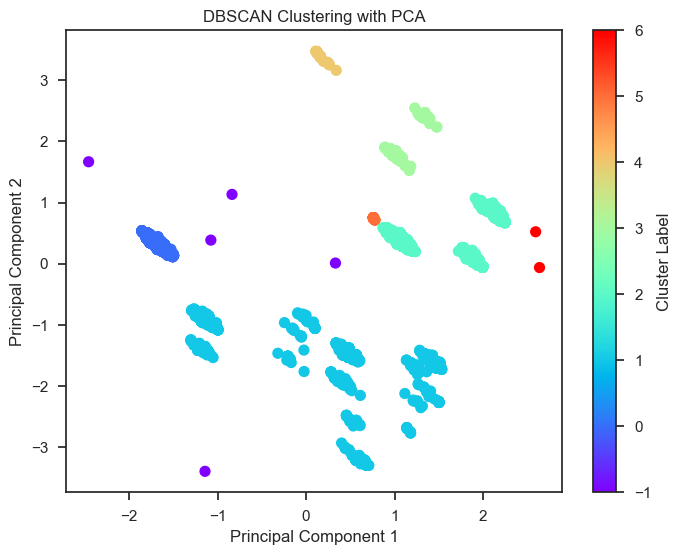

In [124]:
# Create a DBSCAN instance
dbscan = DBSCAN(eps=1.73, min_samples=2)
labels_db = dbscan.fit_predict(df)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_db, cmap='rainbow', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering with PCA')
plt.colorbar(label='Cluster Label')
plt.show()

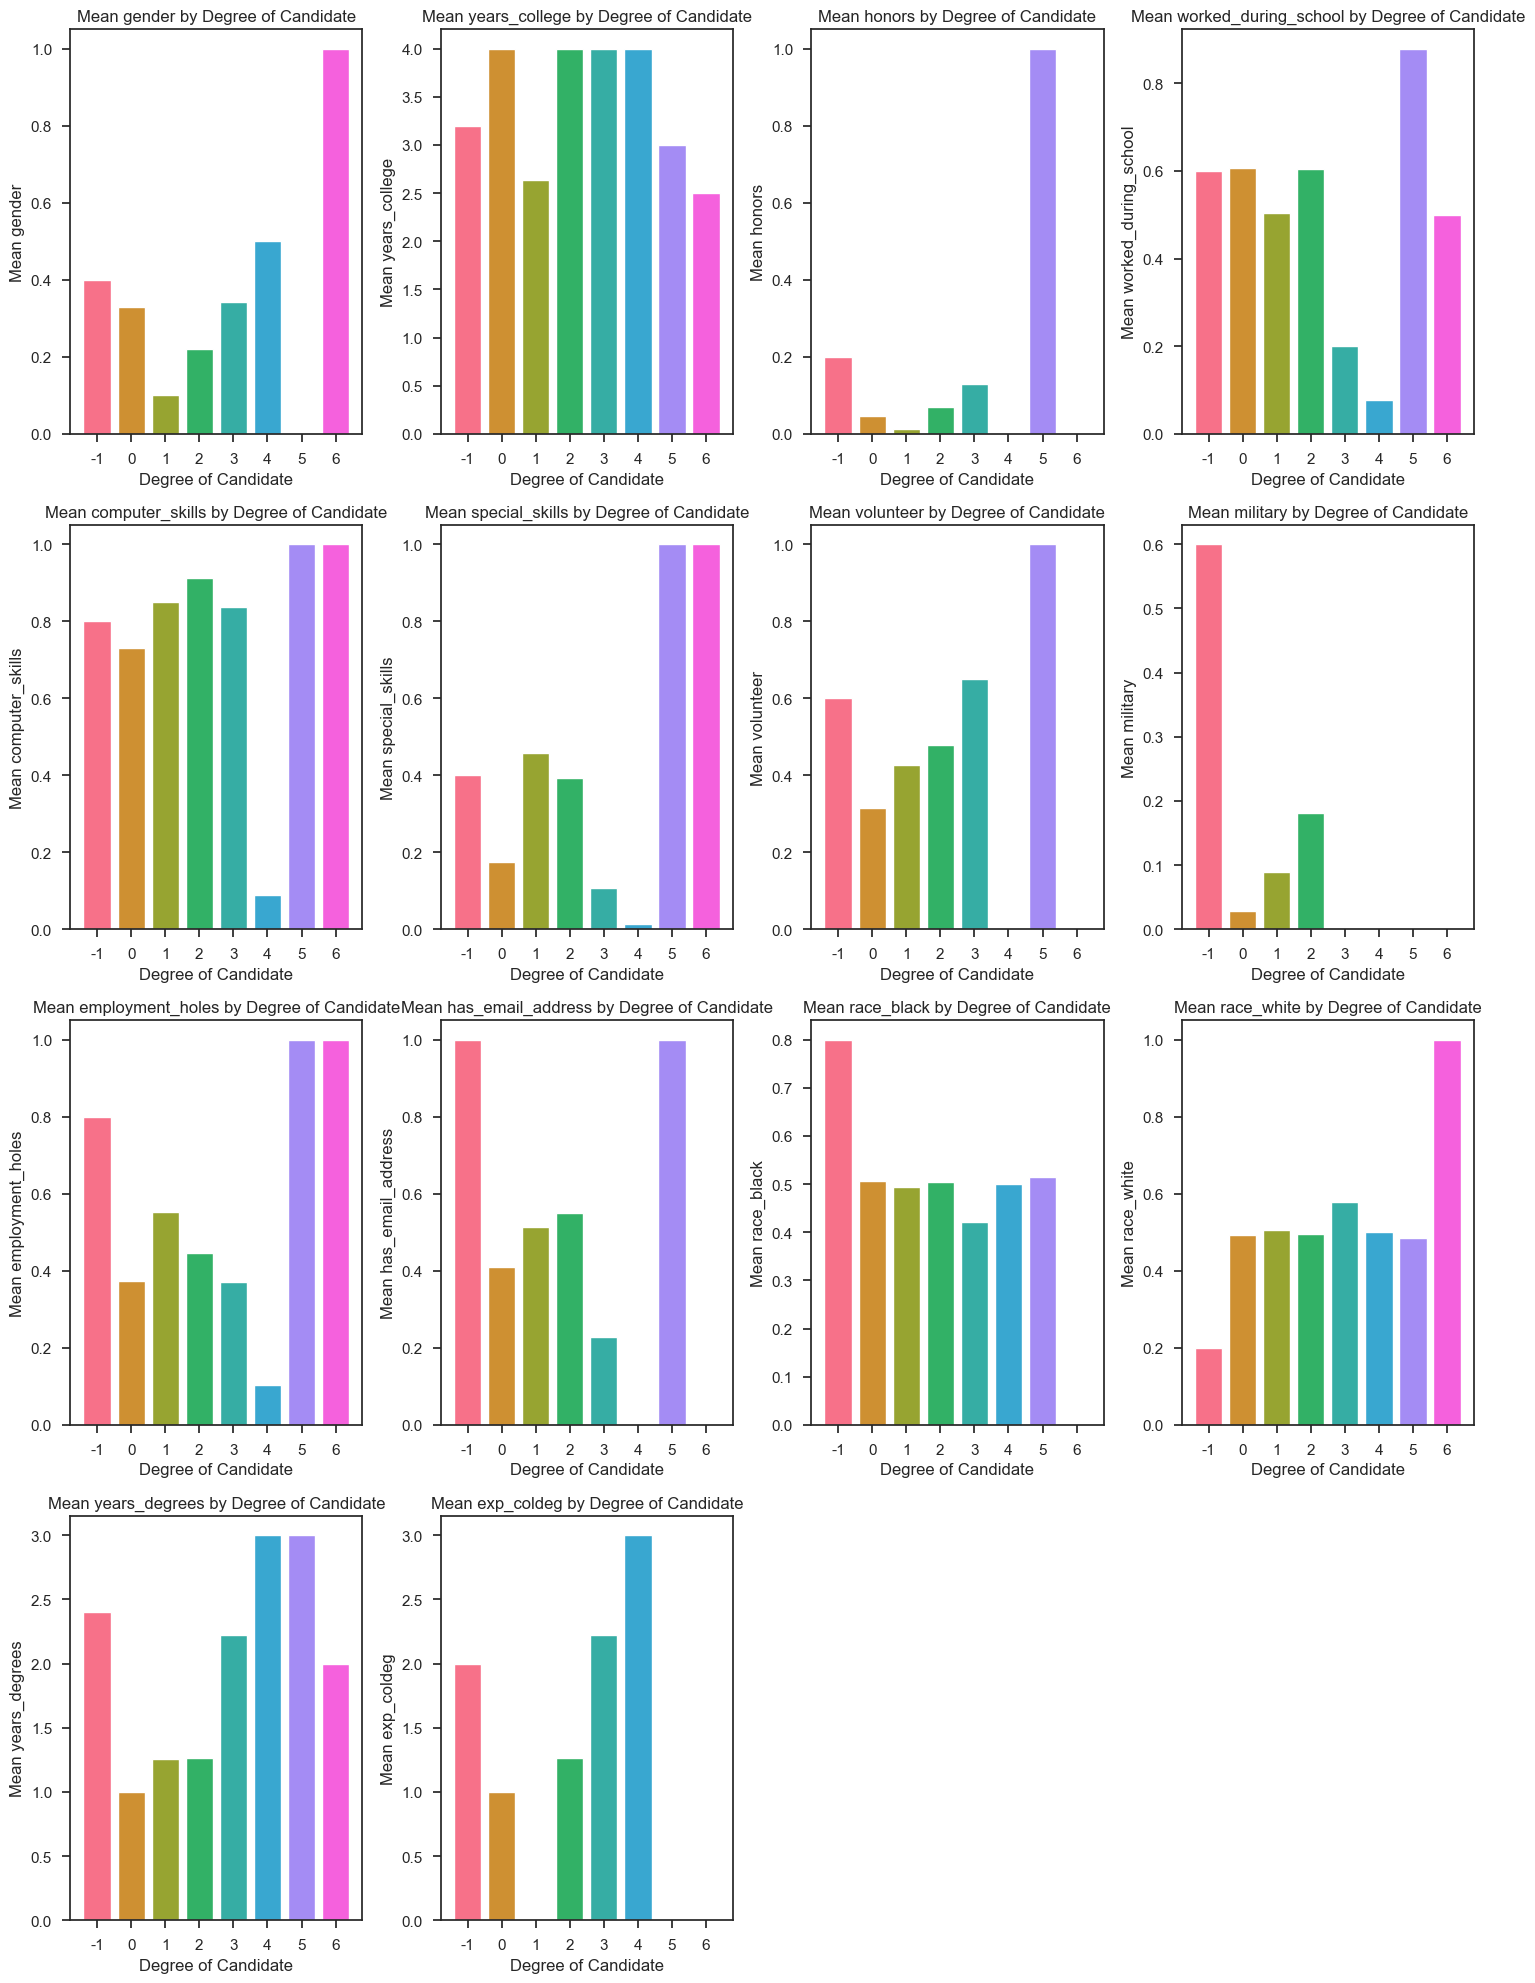

In [129]:
#Let's look at avg values by each features
Personal = ['gender', 'years_college', 'honors', 'worked_during_school', 'computer_skills', 'special_skills', 'volunteer', 'military', 'employment_holes', 'has_email_address', 'race_black', 'race_white', 'years_degrees', 'exp_coldeg']
columns_per_row = 4
num_columns = len(Personal)
num_rows = (num_columns + columns_per_row - 1) // columns_per_row
cluster_colors = sns.color_palette("husl", n_colors=len(df['DegreeofCandidate'].unique()))
# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for i, column in enumerate(Personal):
    ax = axes[i]
    mean_values = df.groupby(by='DegreeofCandidate')[column].mean()
    ax.bar(mean_values.index, mean_values.values, color=cluster_colors)
    ax.set_title(f'Mean {column} by Degree of Candidate')
    ax.set_xlabel('Degree of Candidate')
    ax.set_ylabel(f'Mean {column}')
    ax.set_xticks(mean_values.index)
    ax.set_xticklabels(mean_values.index)    
# Remove any empty subplots
for i in range(num_columns, num_rows * columns_per_row):
    fig.delaxes(axes[i])
plt.tight_layout()

plt.show()

### The End